In [1]:
# This Jupyter notebook is made by Dawoon Jung following "An Introduction to Statistical Learning"
# Python version 3.11
!python --version

Python 3.11.7


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

<h1 style="font-size:50px; color:black;">Resampling methods</h1>

Resampling methods are widely used in modern statistics to gain further insights into model performance by drawing multiple samples from a dataset and refitting the model on each sample. These methods are indispensable tools for evaluating the variability of model estimates and improving the robustness of statistical models.

**Key Points:**
- Resampling involves drawing multiple subsets from the original dataset (the training set).
- The model is refitted on each subset to assess variability or performance.
- Useful for understanding how the model behaves on different data samples.

The two most commonly used resampling techniques are **cross-validation** and **the bootstrap**. Both of these methods are fundamental in the practical application of statistical learning procedures.

#### Cross-Validation
- Used to estimate test error and evaluate a model's performance (Model Assessment).
- Can be applied to select the optimal level of complexity for a model(Model Selection).
  
#### Bootstrap
- Used to estimate the accuracy of a parameter or to assess the overall accuracy of a model.
- Provides a measure of variability and confidence in statistical estimates.

<h1 style="font-size:50px; color:black;">Data - Auto</h1>

In [19]:
data = pd.read_csv('Data/Auto.csv')
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

Auto Data is consisted of Gas mileage, horsepower, and other information for 392 vehicles. The dataframe with 392 observations on the following 9 variables.**`mpg`** (miles per gallon), **`cylinders`**(Number of cylinders between 4 and 8), **`displacement`**(Engine displacement (cu. inches)), **`horsepower`**(Engine horsepower), **`weight`**(Vehicle weight (lbs.)), **`acceleration`**(Time to accelerate from 0 to 60 mph (sec.)), **`year`**(Model year (modulo 100)), **`origin`**(Origin of car (1. American, 2. European, 3. Japanese)), **`name`** (Vehicle name)


In [20]:
np.shape(data)

(392, 9)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [22]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [23]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<h1 style="font-size:50px; color:black;">Validation Set Approach</h1>

**The validation set approach** provides a straightforward way to estimate the test error associated with fitting a statistical model. It involves splitting the data into a **training set** and a **validation set** (also known as a **hold-out set**), fitting a model on the training data, and evaluating its performance on the validation set using a suitable metric, such as **Mean Squared Error (MSE)**.

In this example, we illustrate the validation set approach using the **Auto** dataset, where we aim to predict **miles per gallon (mpg)** using **horsepower** as a predictor. 



### Polynomial Regression Model

In a polynomial regression model, we aim to fit a polynomial function to the data. The general form of the polynomial regression equation is:

$$
\hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \cdots + \beta_d X^d
$$

Where:
- $\hat{y}$ is the predicted value.
- $X$ is the independent variable (feature).
- $\beta_0, \beta_1, \beta_2, \dots, \beta_d$ are the regression coefficients.
- $d$ is the degree of the polynomial.

### Steps to Fit a Polynomial Regression Model

1. **Polynomial Feature Generation**:  
   We generate polynomial features from the input variable $X$ up to the specified degree $d$. For each sample $X_i$, the corresponding polynomial features are:

   $$
   X_{\text{poly}} = [1, X_i, X_i^2, X_i^3, \dots, X_i^d]
   $$

   The vector $X_{\text{poly}}$ includes a bias term (the intercept) as well as the higher-degree terms.
<br>

2. **Normal Equation for Coefficient Estimation**:  
   To estimate the coefficients $\beta_0, \beta_1, \dots, \beta_d$, we use the **Normal Equation**, which is expressed as:

   $$
   \boldsymbol{\beta} = (X_{\text{poly}}^T X_{\text{poly}})^{-1} X_{\text{poly}}^T y
   $$

   Where:
   - $X_{\text{poly}}$ is the matrix of polynomial features.
   - $y$ is the vector of target values.
   - $\boldsymbol{\beta}$ is the vector of coefficients.
<br>

3. **Prediction**:  
   Once the coefficients $\boldsymbol{\beta}$ are computed, predictions for a new input $X$ are made using the equation:

   $$
   \hat{y} = X_{\text{poly}} \cdot \boldsymbol{\beta}
   $$

   Where $X_{\text{poly}}$ is the matrix of polynomial features for the new input $X$.

In [24]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree=1):
        
        self.degree = degree
        self.coefficients = None

    def _polynomial_features(self, X):
        
        # Create polynomial features up to the given degree
        X_poly = np.ones((X.shape[0], 1))  # Initialize with bias (intercept) term (ones)
        
        # Add polynomial terms up to the specified degree
        for d in range(1, degree + 1):  
            X_poly = np.hstack((X_poly, (X**d).reshape(-1, 1)))  # Ensure X**d is reshaped to (n_samples, 1)
            
        return X_poly

    def fit(self, X, y):
        
        # Generate polynomial features
        X_poly = self._polynomial_features(X)
        
        # Use the Normal Equation to calculate the coefficients
        # beta = (X_poly.T * X_poly)^-1 * X_poly.T * y
        self.coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    def predict(self, X):

        # Generate polynomial features
        X_poly = self._polynomial_features(X)
        
        # Predict using the polynomial regression coefficients
        return X_poly.dot(self.coefficients)

    def get_coefficients(self):
        return self.coefficients


In [25]:
X = np.array(data['horsepower']).reshape(-1,1)
y = np.array(data['mpg']).reshape(-1,1)

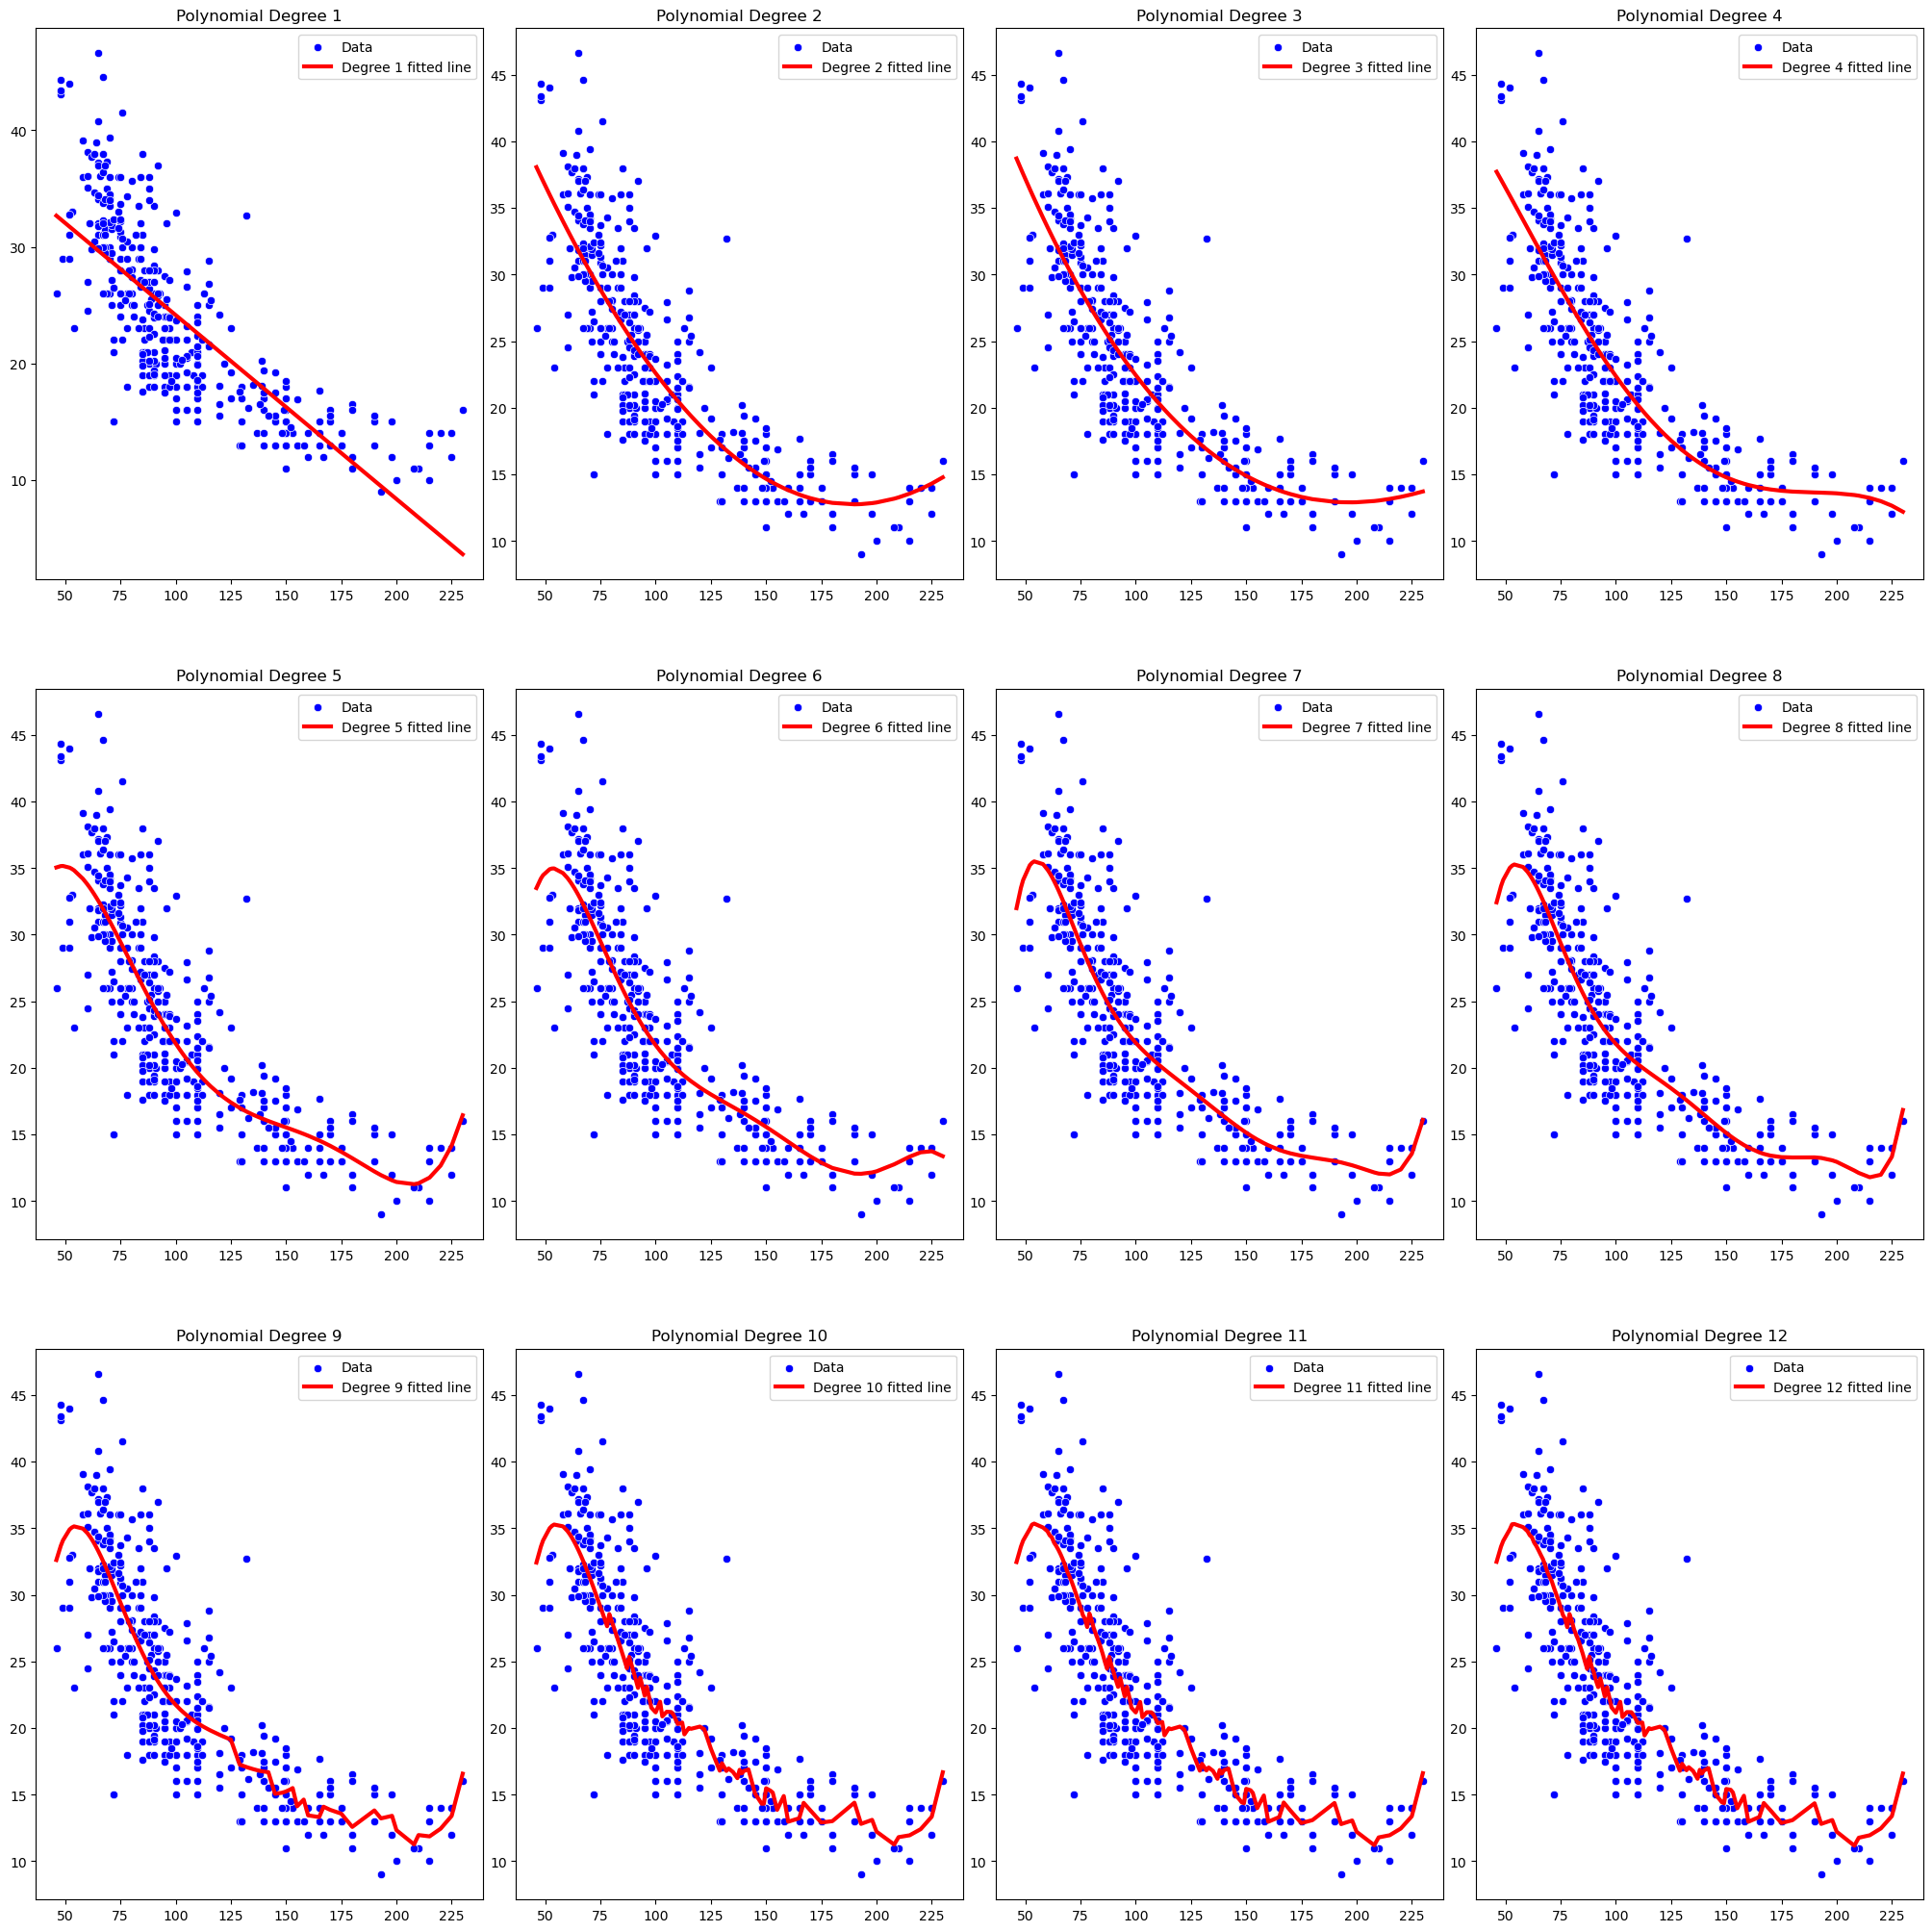

In [29]:
# Create a figure with 4 rows and 3 columns of subplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Iterate over each degree, fit the model, and create plots
for degree in range(1, 13):
    model = PolynomialRegression(degree)
    model.fit(X, y)

    # Plot the original data (blue points)
    sns.scatterplot(x=X.flatten(), y=y.flatten(), color='blue', ax=ax[degree - 1], label='Data')

    # Sort X for smooth line plotting
    X_sorted = np.sort(X, axis=0)
    
    # Plot the predicted fitted line (red line)
    sns.lineplot(x=X_sorted.flatten(), 
                 y=model.predict(X_sorted).flatten(), 
                 color='red', 
                 ax=ax[degree - 1], 
                 label=f'Degree {degree} fitted line',
                 linewidth = 3)
    
    # Add a title to each subplot
    ax[degree - 1].set_title(f'Polynomial Degree {degree}')
    ax[degree - 1].legend()

# Adjust the layout of the plots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Display the plot
plt.show()


#### Steps in the Validation Set Approach

- **Step 1**: Split the data randomly into two sets:
  - **training set** and **validation set**

- **Step 2**: Fit various regression models (linear, quadratic, cubic, etc.) on the **training set**.

- **Step 3**: Calculate the **validation set MSE** for each model, using the **validation set** to estimate the prediction error.

---

In [31]:
def train_valid_split(data, valid_ratio, random_state=None):
    # Set random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    # Generate indices for the data and shuffle them
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    

    # Split indices into valid and train based on valid_size
    valid_indices = indices[:int(valid_ratio*len(data))]
    train_indices = indices[int(valid_ratio*len(data)):]

    # Split the data according to the shuffled indices
    valid_data = data.loc[valid_indices]
    train_data = data.loc[train_indices]

    return train_data, valid_data

In [32]:
train_data, valid_data = train_valid_split(data, 0.2, 42)

In [33]:
len(train_data), len(valid_data)

(314, 78)

In [34]:
train_data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
258,18.6,6,225.0,110,3620,18.7,78,1,dodge aspen


In [35]:
valid_data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
78,26.0,4,96.0,69,2189,18.0,72,2,renault 12 (sw)
274,21.6,4,121.0,115,2795,15.7,78,2,saab 99gle


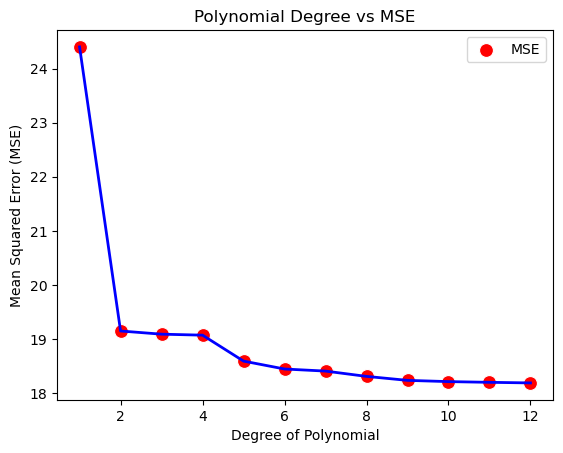

In [39]:
# training data
X_train = np.array(train_data['horsepower']).reshape(-1, 1)  # Reshape to (n_samples, 1)
y_train = np.array(train_data['mpg']).reshape(-1, 1)         # Reshape to (n_samples, 1)

models = []
temp_mse = []  # List to store MSE for each polynomial degree

# Iterate over degrees 1 to 12, train model, and compute MSE
for degree in range(1, 13):
    
    # Create and fit the polynomial regression model
    model = PolynomialRegression(degree)
    model.fit(X_train, y_train)
    models.append(model)
    
    # Predict on training data
    y_pred = model.predict(X_train)
    
    # Calculate Mean Squared Error (MSE) and append to temp_mse list
    mse = np.mean((y_train - y_pred) ** 2)
    temp_mse.append(mse)

# Degree values (X-axis)
degrees = [degree for degree in range(1, 13)]

# Plot the degree vs MSE with both scatter plot and line plot
sns.scatterplot(x=degrees, 
                y=temp_mse, 
                color='red', 
                marker='o', 
                s=100,  # Size of the markers
                label='MSE')

# Connect the points with a line plot
sns.lineplot(x=degrees, 
             y=temp_mse, 
             color='blue', 
             linewidth=2)

# Set plot labels and title
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Polynomial Degree vs MSE')

# Display the plot
plt.show()


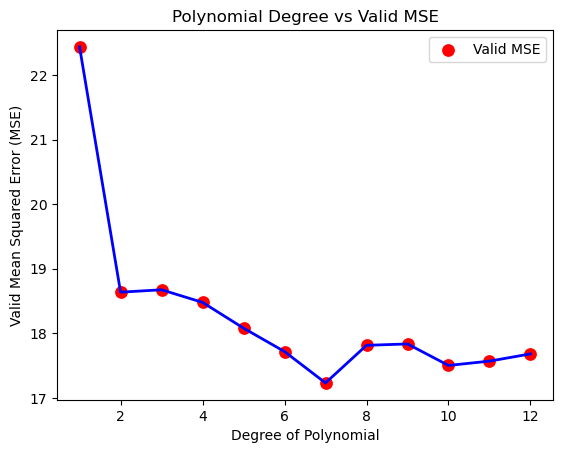

In [40]:
# valid data
X_valid = np.array(valid_data['horsepower']).reshape(-1, 1)  # Reshape to (n_samples, 1)
y_valid = np.array(valid_data['mpg']).reshape(-1, 1)         # Reshape to (n_samples, 1)

temp_mse = []  # List to store MSE for each polynomial degree

# Iterate over degrees 1 to 12, using trained model, and compute valid MSE
for degree in range(1, 13):
    
    # Predict on training data
    y_pred = models[degree-1].predict(X_valid)
    
    # Calculate Mean Squared Error (MSE) and append to temp_mse list
    mse = np.mean((y_valid - y_pred) ** 2)
    temp_mse.append(mse)

# Degree values (X-axis)
degrees = [degree for degree in range(1, 13)]

# Plot the degree vs valid MSE with both scatter plot and line plot
sns.scatterplot(x=degrees, 
                y=temp_mse, 
                color='red', 
                marker='o', 
                s=100,  # Size of the markers
                label='Valid MSE')

# Connect the points with a line plot
sns.lineplot(x=degrees, 
             y=temp_mse, 
             color='blue', 
             linewidth=2)

# Set plot labels and title
plt.xlabel('Degree of Polynomial')
plt.ylabel('Valid Mean Squared Error (MSE)')
plt.title('Polynomial Degree vs Valid MSE')

# Display the plot
plt.show()


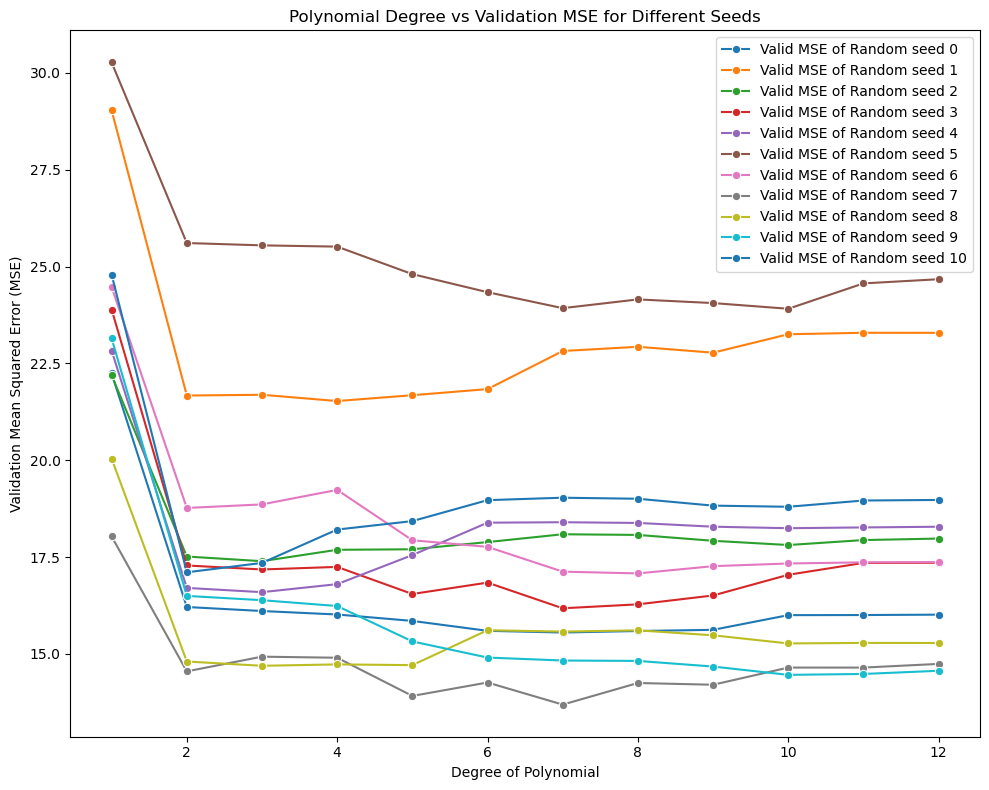

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

random_seeds = [i for i in range(0, 11)]  # List of random seeds
degrees = [degree for degree in range(1, 13)]  # Polynomial degrees

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 8))

for random_seed in random_seeds:
    # Split data into training and validation sets based on random seed
    train_data, valid_data = train_valid_split(data, 0.2, random_seed)
    
    # Prepare training and validation data
    X_train = np.array(train_data['horsepower']).reshape(-1, 1)  # Training X
    y_train = np.array(train_data['mpg']).reshape(-1, 1)         # Training y
    X_valid = np.array(valid_data['horsepower']).reshape(-1, 1)  # Validation X
    y_valid = np.array(valid_data['mpg']).reshape(-1, 1)         # Validation y

    # List to store polynomial regression models
    models = []
    
    for degree in degrees:
        # Create and fit the polynomial regression model
        model = PolynomialRegression(degree)
        model.fit(X_train, y_train)
        models.append(model)

    temp_mse = []  # List to store valid MSE for each polynomial degree
    
    # Iterate over degrees, predict on validation set, and compute valid MSE
    for degree in range(1, 13):
        # Predict on validation data using the trained model
        y_pred = models[degree - 1].predict(X_valid)

        # Calculate Mean Squared Error (MSE) for validation set
        mse = np.mean((y_valid - y_pred) ** 2)
        temp_mse.append(mse)

    # Plot the degree vs validation MSE with both scatter plot and line plot
    sns.lineplot(x=degrees, 
                 y=temp_mse, 
                 marker='o', 
                 label=f'Valid MSE of Random seed {random_seed}', 
                 ax=ax)

# Set plot labels and title
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Validation Mean Squared Error (MSE)')
ax.set_title('Polynomial Degree vs Validation MSE for Different Seeds')

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()



#### Results from Validation Set Approach

- The MSE on the training set decreases with higher order. Surprisingly, higher order models have high MSE!
- We repeated the validation process **ten times**, no consensus was reached on which order polynomial model is the best as the curves gave different results.

This variability demonstrates one of the **limitations** of the validation set approach: the outcome can vary depending on how the data is split. While we can confidently conclude that the linear fit is inadequate, we cannot draw definitive conclusions about higher-order terms due to the variability.


**Limitations of the Validation Set Approach:**

- **High variability in the error estimate**: 
- **Inefficient use of data**:
   - Since only a subset of the data (the training set) is used to fit the model, the model's performance might be suboptimal compared to a model trained on the entire dataset. This can result in the validation set error **overestimating** the true test error.

---

#### Moving to Cross-Validation

To address these two issues, **cross-validation** was introduced, a more refined method that reduces variability and makes more efficient use of the data. Cross-validation improves on the validation set approach by using multiple training/validation splits or resampling methods to better estimate the model's performance.

<h1 style="font-size:50px; color:black;">Leave-One-Out Cross validation</h1>

**Leave-one-out cross-validation (LOOCV)** is a variant of the validation set approach that addresses some of its limitations. Like the validation set method, LOOCV involves splitting the data into two sets: a **training set** and a **validation set**. However, the way this split is done is different and aims to reduce the variability seen in the standard validation set approach.

#### Key Concepts:

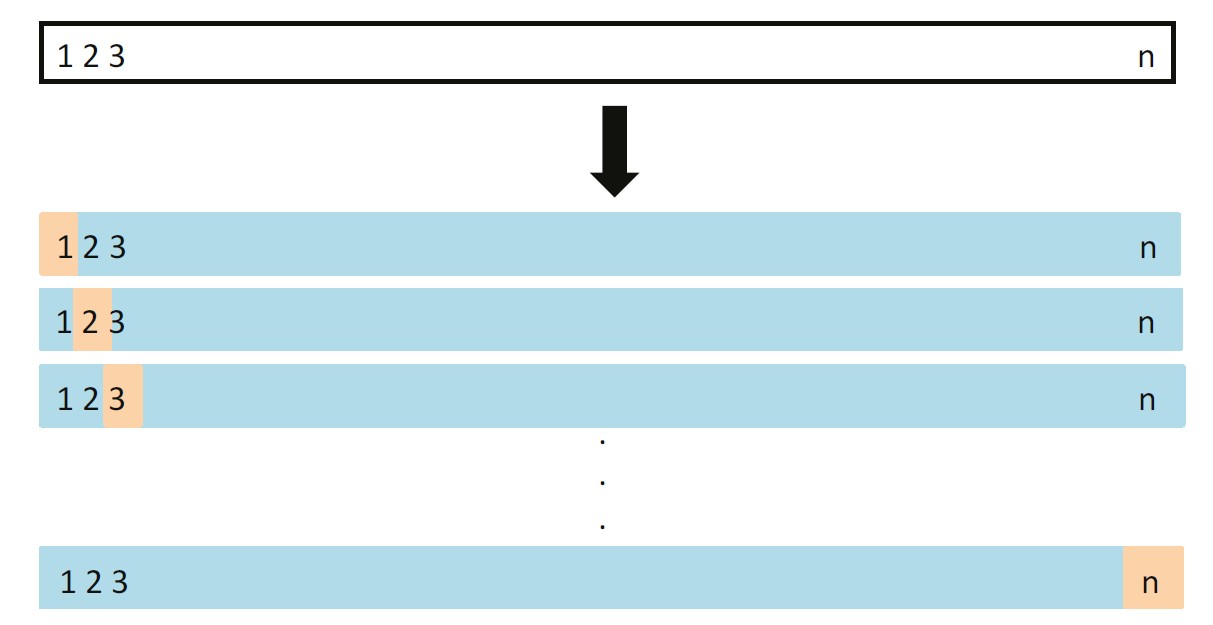

- In LOOCV, instead of dividing the data into two subsets of comparable size, **only one observation** is used as the **validation set**, and the remaining $n-1$ observations form the **training set**.
- The model is trained on the $n-1$ training observations, and a prediction $\hat{y}_1$ is made for the excluded observation $(x_1, y_1)$. Since $(x_1, y_1)$ was not used in the training process, the **Mean Squared Error (MSE)** for this observation is given by:

$$
\text{MSE}_1 = (y_1 - \hat{y}_1)^2
$$

- This process is repeated for **each observation** in the dataset, meaning for each $i$, the observation $(x_i, y_i)$ is excluded and the model is fit to the remaining $n-1$ observations. The error for each iteration is computed as:

$$
\text{MSE}_i = (y_i - \hat{y}_i)^2
$$

#### Final LOOCV Estimate:
- After repeating this process for all $n$ observations, the **LOOCV estimate** of the test MSE is the **average** of the $n$ squared errors:

$$
\text{LOOCV MSE} = \frac{1}{n} \sum_{i=1}^{n} \text{MSE}_i
$$

---

#### Advantages of LOOCV:
1. **Unbiased Estimate**: Since each observation is left out exactly once, the test error estimate is approximately unbiased.
2. **Efficient Use of Data**: Unlike the validation set approach, LOOCV uses nearly the entire dataset for training each time, improving the model's performance.

#### Disadvantage:
- **Computational Cost**: LOOCV requires fitting the model $n$ times, which can be computationally expensive for large datasets.

LOOCV provides a robust approach to estimating test error, especially when the dataset is small, but it comes at the cost of increased computational demands.


In [42]:
import numpy as np

class LOOCV:
    def __init__(self, model):
        
        self.model = model
        self.models = []
        self.errors = []

    def fit(self, X, y, degree=None):
        
        self.errors = []  # List to store errors for each iteration
        
        # Iterate over each sample in the dataset
        for i in range(X.shape[0]):
            
            # Split data into train and valid (leave one out)
            X_train = np.delete(X, i, axis=0)
            y_train = np.delete(y, i, axis=0)
            X_valid = X[i].reshape(1, -1)
            y_valid = y[i]
            
            # Create and fit the model on the training data
            model = self.model
            model.fit(X_train, y_train)
            self.models.append(model)
            
            # Predict on the valid point (the left-out point)
            y_pred = model.predict(X_valid)
            
            # Calculate the error (MSE) for this iteration
            error = (y_valid - y_pred) ** 2
            self.errors.append(error[0])
            
        return np.mean(self.errors)

    def get_errors(self):
        return self.errors

In [43]:
X = np.array(data['horsepower']).reshape(-1,1)
y = np.array(data['mpg']).reshape(-1,1)

In [44]:
degree = 5
model = PolynomialRegression(degree)
loocv = LOOCV(model)
loocv.fit(X,y)
np.mean(loocv.get_errors())

19.033213864765322

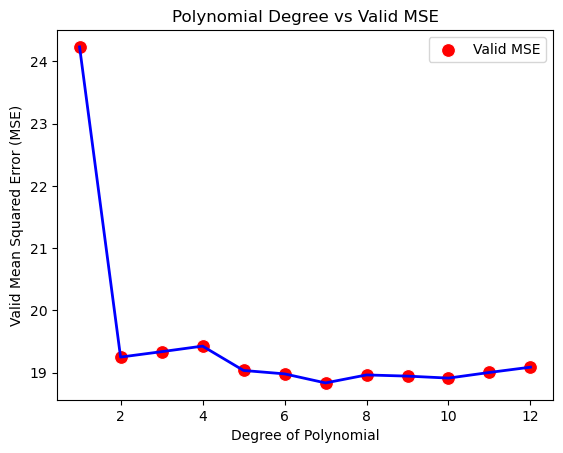

In [45]:
temp_mse = []

for degree in degrees:
    model = PolynomialRegression(degree)
    loocv = LOOCV(model)
    loocv.fit(X,y)
    temp_mse.append(np.mean(loocv.get_errors()))

# Plot the degree vs valid MSE with both scatter plot and line plot
sns.scatterplot(x=degrees, 
                y=temp_mse, 
                color='red', 
                marker='o', 
                s=100,  # Size of the markers
                label='Valid MSE')

# Connect the points with a line plot
sns.lineplot(x=degrees, 
             y=temp_mse, 
             color='blue', 
             linewidth=2)

# Set plot labels and title
plt.xlabel('Degree of Polynomial')
plt.ylabel('Valid Mean Squared Error (MSE)')
plt.title('Polynomial Degree vs Valid MSE')

# Display the plot
plt.show()


<h1 style="font-size:50px; color:black;">k-Fold Cross-Validation</h1>


**k-Fold Cross-Validation (k-fold CV)** is a common alternative to **Leave-One-Out Cross-Validation (LOOCV)**. It is designed to address some of the computational inefficiencies of LOOCV while still providing a robust estimate of test error.

#### Key Concepts:
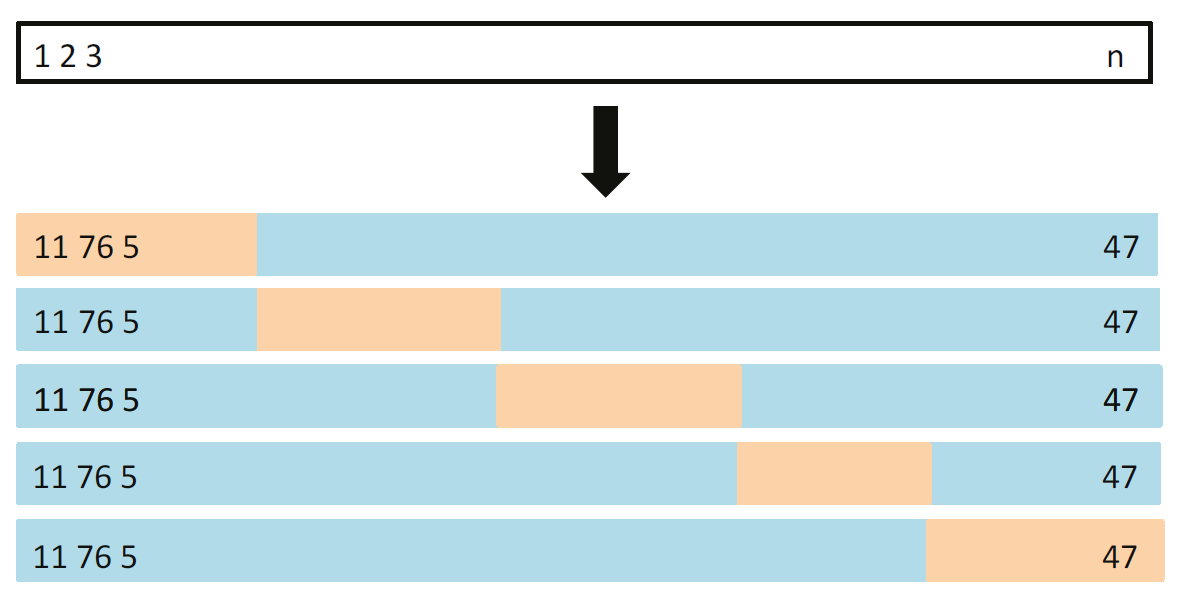

- The dataset is randomly divided into **$k$ groups** or **folds**, each of approximately equal size.
- The method is trained on **$k-1$ folds**, and the remaining fold is used as the **validation set**.
- The **Mean Squared Error (MSE)** is calculated on the held-out fold. This process is repeated $k$ times, each time using a different fold as the validation set.

#### Final k-Fold CV Estimate:
- After repeating the process $k$ times, we obtain $k$ estimates of the test error:

$$
\text{MSE}_1, \text{MSE}_2, \dots, \text{MSE}_k
$$

- The **k-fold CV estimate** is computed as the **average** of these $k$ test error estimates:

$$
\text{k-fold CV MSE} = \frac{1}{k} \sum_{i=1}^{k} \text{MSE}_i
$$

---

#### Advantages of k-Fold CV:
1. **Balanced Trade-off**: k-fold CV provides a balance between the high variance of the validation set approach and the high computation cost of LOOCV.
2. **Efficient Use of Data**: All observations are used for both training and validation, ensuring that no data is wasted.
3. **Reduced Variability**: By averaging the results across $k$ folds, the estimate of the test error is less variable than that from a single validation set approach.

#### Common Choices for $k$:
- **k = 5 or k = 10**: Commonly used values for $k$ in practice. These values provide a good balance between bias and variance.
- **k = n**: When $k$ equals the number of observations ($n$), this method is equivalent to **LOOCV**.

---

#### Disadvantage:
- **Computational Cost**: Although k-fold CV is less computationally expensive than LOOCV, it still requires training the model $k$ times, which can be computationally intensive for large datasets.


In [46]:
import numpy as np

class KFoldCV:
    def __init__(self, model, k=5):
        
        self.model = model
        self.k = k
        self.models = []
        self.errors = []

    def split_indices(self, n_samples):
        
        indices = np.arange(n_samples)
        np.random.shuffle(indices) # Random shuffle
        return np.array_split(indices, self.k)

    def fit(self, X, y, degree=None):
        
        self.errors = []  # Reset errors for each run
        n_samples = X.shape[0]
        fold_indices = self.split_indices(n_samples)

        # Iterate over each fold
        for i in range(self.k):
            # Split data into training and validation sets
            valid_indices = fold_indices[i]
            train_indices = np.concatenate([fold for j, fold in enumerate(fold_indices) if j != i])

            X_train, y_train = X[train_indices], y[train_indices]
            X_valid, y_valid = X[valid_indices], y[valid_indices]

            # Create and fit the model on the training data
            model = self.model
            model.fit(X_train, y_train)
            self.models.append(model)

            # Predict on the validation set
            y_pred = model.predict(X_valid)

            # Calculate the error (MSE) for this fold
            error = np.mean((y_valid - y_pred) ** 2)
            self.errors.append(error)

        # Return the mean error across all folds
        return np.mean(self.errors)

    def get_errors(self):
        return self.errors



In [47]:
X = np.array(data['horsepower']).reshape(-1,1)
y = np.array(data['mpg']).reshape(-1,1)

In [48]:
degree = 1
model = PolynomialRegression(degree)
kfold_cv = KFoldCV(model)
kfold_cv.fit(X,y)
np.mean(kfold_cv.get_errors())

24.448560928606007

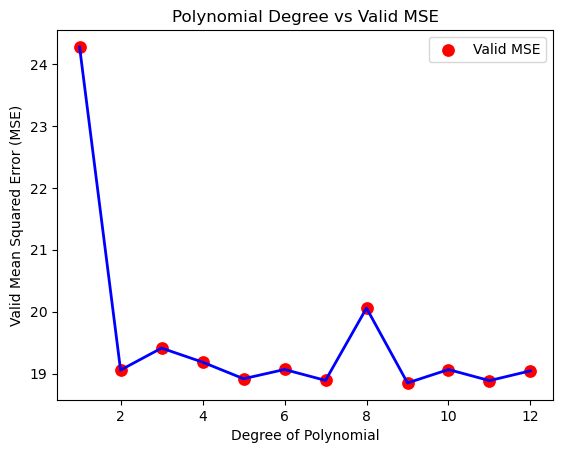

In [49]:
temp_mse = []
for degree in degrees:
    kfold_cv = KFoldCV(model)
    kfold_cv.fit(X,y)
    temp_mse.append(np.mean(kfold_cv.get_errors()))

# Plot the degree vs valid MSE with both scatter plot and line plot
sns.scatterplot(x=degrees, 
                y=temp_mse, 
                color='red', 
                marker='o', 
                s=100,  # Size of the markers
                label='Valid MSE')

# Connect the points with a line plot
sns.lineplot(x=degrees, 
             y=temp_mse, 
             color='blue', 
             linewidth=2)

# Set plot labels and title
plt.xlabel('Degree of Polynomial')
plt.ylabel('Valid Mean Squared Error (MSE)')
plt.title('Polynomial Degree vs Valid MSE')

# Display the plot
plt.show()


In [50]:
degree = 1
model = PolynomialRegression(degree)

kfold_cv = KFoldCV(model, k = 5)
kfold_cv.fit(X,y)
np.mean(kfold_cv.get_errors())

24.069727646312572

In [51]:
degree = 1
model = PolynomialRegression(degree)
loocv = LOOCV(model)
loocv.fit(X,y)
np.mean(loocv.get_errors())

24.231513517929226

In [52]:
degree = 1
model = PolynomialRegression(degree)
kfold_cv = KFoldCV(model, k = X.shape[0])
kfold_cv.fit(X,y)
np.mean(kfold_cv.get_errors())

24.231513517929233

In [53]:
degree = 1
model = PolynomialRegression(degree)
loocv = LOOCV(model)
loocv.fit(X,y)
np.mean(loocv.get_errors())

24.231513517929226

---

### Two Goals of Cross-Validation:

When using cross-validation, there are two potential goals:

1. **Estimating the Test MSE**:
   - If the objective is to understand how well a model will perform on independent data, the actual test MSE estimate from cross-validation is important.

<br>

2. **Identifying the Optimal Model Complexity**:
   - Often, the goal of cross-validation is not to focus on the exact test MSE, but rather to find the model or complexity level that minimizes the test error.
   - In this context, the **location of the minimum point** in the cross-validation curve is crucial, as it identifies the complexity level corresponding to the lowest test error.

---
## Bias-Variance Trade-Off for k-Fold Cross-Validation

In the previous section, we discussed the computational advantages of **k-fold Cross-Validation (CV)** when $k < n$ compared to **Leave-One-Out Cross-Validation (LOOCV)**. However, putting aside computational concerns, **k-fold CV** with $k = 5$ or $k = 10$ often provides **more accurate estimates** of the test error rate than LOOCV, due to the **bias-variance trade-off**.

---

#### Bias in k-Fold CV vs. LOOCV

- **LOOCV** gives approximately **unbiased estimates** of the test error because each training set contains **$n-1$ observations**, which is almost as many as the full dataset. As a result, LOOCV effectively minimizes bias (overfitting).
  
- In contrast, **k-fold CV** with $k = 5$ or $k = 10$ has **slightly more bias** compared to LOOCV, since each training set contains roughly $(k-1)n/k$ observations—**fewer** than in LOOCV but **more** than in the validation set approach. Therefore, k-fold CV represents an **intermediate level of bias** between LOOCV and the validation set approach.

- **Summary of Bias**:
  - Validation set approach: High bias (due to smaller training sets).
  - LOOCV: Low bias (training sets almost as large as the full dataset).
  - k-fold CV: Moderate bias (but still lower than the validation set approach).

---

#### Variance in k-Fold CV vs. LOOCV

While LOOCV has low bias, it tends to have **higher variance** than k-fold CV. This is because of the following:

- In **LOOCV**, we average the outputs of **$n$ fitted models**, each trained on an almost identical set of observations. This leads to **high positive correlation** between the models' outputs, increasing the variance of the final test error estimate.
  
- In contrast, **k-fold CV** averages the outputs of **$k$ fitted models**, where each model's training set has **less overlap** with the others. As a result, the outputs are **less correlated**, leading to a **lower variance** in the test error estimate.

- **Summary of Variance**:
  - LOOCV: High variance (due to high correlation between training sets).
  - k-fold CV: Lower variance (due to reduced correlation among training sets).

---

#### The Bias-Variance Trade-Off

- **LOOCV** has the advantage of **low bias** but suffers from **high variance**.
- **k-fold CV** ($k = 5$ or $k = 10$) strikes a balance between bias and variance, offering a **slightly higher bias** but **significantly lower variance** than LOOCV.
  
Given this **bias-variance trade-off**, empirical studies suggest that using **$k = 5$ or $k = 10$** in k-fold CV typically provides the best balance, yielding test error estimates that are neither too biased nor too variable.

---


## Cross-Validation on Classification Problems

So far, we have used **cross-validation** in the context of **regression problems**, where the outcome $Y$ is quantitative, and **Mean Squared Error (MSE)** was used to quantify test error. However, cross-validation can also be applied to **classification problems**, where the outcome $Y$ is qualitative. The cross-validation procedure is similar to that in regression, but instead of using MSE to quantify test error, we use the **number of misclassified observations**.

---

#### LOOCV Error Rate for Classification

In the classification setting, the **LOOCV error rate** is calculated as follows:

$$
\text{LOOCV Error} (n) = \frac{1}{n} \sum_{i=1}^{n} Err_i
$$

Where:
- $Err_i = I(y_i \neq \hat{y}_i)$ indicates whether the $i$-th observation was misclassified.
- $I(\cdot)$ is the **indicator function** that returns 1 if $y_i$ is misclassified, and 0 otherwise.

The **k-fold CV error rate** and **validation set error rates** are computed similarly by replacing the MSE metric with the **number of misclassified observations**.


<h1 style="font-size:50px; color:black;">The Bootstrap</h1>

The **bootstrap** is a powerful and flexible statistical tool used to quantify the **uncertainty** associated with a given estimator or statistical learning method. It can be applied across a wide range of scenarios, even for methods where estimating variability is otherwise difficult or not provided by standard statistical software.

#### Example: Estimating Standard Errors in Linear Regression

While the bootstrap can be used to estimate the **standard errors** of coefficients in a **linear regression** model, this is not particularly useful in this case, since standard statistical software (like R) automatically provides these standard errors. However, the strength of the bootstrap lies in its general applicability to more complex methods where obtaining such variability measures is not straightforward.

---

### Bootstrap Example: Optimal Investment Allocation

Suppose we want to invest a fixed sum in two financial assets that yield returns $X$ and $Y$, which are random variables. We will invest a fraction $\theta$ in $X$ and $(1 - \theta)$ in $Y$. Our goal is to minimize the total risk, or **variance**, of the investment, which is given by:

$$
\text{Var}(\theta X + (1 - \theta) Y)
$$

The optimal value of $\theta$ that minimizes this variance is:

$$
\theta = \frac{\sigma_Y^2 - \text{Cov}(X, Y)}{\sigma_X^2 + \sigma_Y^2 - 2\text{Cov}(X, Y)}
$$

Where:
- $\sigma_X^2$ is the variance of $X$
- $\sigma_Y^2$ is the variance of $Y$
- $\text{Cov}(X, Y)$ is the covariance between $X$ and $Y$

Since these quantities are generally unknown, we can compute estimates for $\sigma_X^2$, $\sigma_Y^2$, and $\text{Cov}(X, Y)$ using past data, and then estimate $\theta$ using the following formula:

$$
\hat{\theta} = \frac{\hat{\sigma}_Y^2 - \hat{\text{Cov}}(X, Y)}{\hat{\sigma}_X^2 + \hat{\sigma}_Y^2 - 2\hat{\text{Cov}}(X, Y)}
$$

---

<h4 style=weight:bold;color:red>Derive: </h4>

The formula for $\hat{\theta}$ comes from the goal of minimizing the variance (risk) of an investment split between two assets with returns $X$ and $Y$. Here's a step-by-step explanation of how this formula is derived.

---

Using the properties of variance for linear combinations of random variables, the variance of $\theta X + (1 - \theta) Y$ is:

$$
\text{Var}(R) = \theta^2 \text{Var}(X) + (1 - \theta)^2 \text{Var}(Y) + 2 \theta (1 - \theta) \text{Cov}(X, Y)
$$

Where:
- $\text{Var}(X) = \sigma_X^2$: the variance of $X$
- $\text{Var}(Y) = \sigma_Y^2$: the variance of $Y$
- $\text{Cov}(X, Y) = \sigma_{XY}$: the covariance between $X$ and $Y$

Thus, the equation becomes:

$$
\text{Var}(R) = \theta^2 \sigma_X^2 + (1 - \theta)^2 \sigma_Y^2 + 2 \theta (1 - \theta) \sigma_{XY}
$$

---

To find the value of $\theta$ that minimizes the variance, we need to take the derivative of $\text{Var}(R)$ with respect to $\theta$ and set it to 0:

$$
\frac{d}{d\theta} \text{Var}(R) = 2 \theta \sigma_X^2 - 2 (1 - \theta) \sigma_Y^2 + 2 \sigma_{XY} (1 - 2 \theta)
$$

Set the derivative equal to 0:

$$
2 \theta \sigma_X^2 - 2 (1 - \theta) \sigma_Y^2 + 2 \sigma_{XY} (1 - 2 \theta) = 0
$$

Simplifying:

$$
\theta \sigma_X^2 - (1 - \theta) \sigma_Y^2 + \sigma_{XY} (1 - 2 \theta) = 0
$$

Expanding the terms:

$$
\theta \sigma_X^2 - \sigma_Y^2 + \theta \sigma_Y^2 + \sigma_{XY} - 2 \theta \sigma_{XY} = 0
$$

Group the terms involving $\theta$:

$$
\theta (\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}) = \sigma_Y^2 - \sigma_{XY}
$$

Solve for $\theta$:

$$
\theta = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}}
$$

---


In [54]:
# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Simulate the returns for X and Y (100 pairs of returns)
n_samples = 10000
X = np.random.normal(5, 2, size=n_samples)  # Returns for asset X
Y = np.random.normal(3, 1.5, size=n_samples)  # Returns for asset Y

# Step 2: Define the function to estimate theta
def estimate_theta(X, Y):
    sigma_X2 = np.var(X, ddof=1)  # Variance of X
    sigma_Y2 = np.var(Y, ddof=1)  # Variance of Y
    cov_XY = np.cov(X, Y, ddof=1)[0, 1]  # Covariance between X and Y
    
    # Estimate theta using the given formula
    theta_hat = (sigma_Y2 - cov_XY) / (sigma_X2 + sigma_Y2 - 2 * cov_XY)
    
    return theta_hat


---

### The Bootstrap Procedure

In practice, we cannot simulate new samples from the population as we did in the toy example above. Instead, the **bootstrap** allows us to emulate this process using the original data set. The procedure is as follows:

1. **Resampling with Replacement**: From the original dataset (which we call $Z$), we randomly select **$n$ observations** (with replacement) to create a new **bootstrap dataset** $Z^{*1}$.

2. **Bootstrap Estimate**: We compute a new estimate of $\hat{\theta}^{*1}$ using $Z^{*1}$.

3. **Repeat**: This process is repeated **$B$ times** to produce $B$ different bootstrap datasets ($Z^{*1}, Z^{*2}, ..., Z^{*B}$) and corresponding estimates $\hat{\theta}^{*1}, \hat{\theta}^{*2}, ..., \hat{\theta}^{*B}$.

4. **Standard Error**: The **standard error** of the bootstrap estimates is given by:

$$
\text{SE}_B(\hat{\theta}) = \sqrt{\frac{1}{B - 1} \sum_{r=1}^{B} \left( \hat{\theta}^{*r} - \frac{1}{B} \sum_{r=1}^{B} \hat{\theta}^{*r} \right)^2}
$$

This formula gives an estimate of the variability in $\hat{\theta}$ based on the resampled data.

---

In [55]:
# Step 3: Estimate theta for the original data
theta_hat = estimate_theta(X, Y)
print(f"Estimated theta: {theta_hat:.4f}")

# Step 4: Bootstrap procedure to estimate the variability of theta
B = 1000  # Number of bootstrap samples
bootstrap_thetas = []

for i in range(B):
    # Resample with replacement from the original data
    X_bootstrap = np.random.choice(X, size=n_samples, replace=True)
    Y_bootstrap = np.random.choice(Y, size=n_samples, replace=True)
    
    # Estimate theta for the bootstrap sample
    theta_bootstrap = estimate_theta(X_bootstrap, Y_bootstrap)
    bootstrap_thetas.append(theta_bootstrap)

# Step 5: Compute the standard error of the bootstrap estimates
bootstrap_thetas = np.array(bootstrap_thetas)
theta_mean = np.mean(bootstrap_thetas)
theta_std_error = np.std(bootstrap_thetas)
print(f"Mean of bootstrap estimates: {theta_mean:.4f}")
print(f"Standard error of bootstrap estimates: {theta_std_error:.4f}")


Estimated theta: 0.3600
Mean of bootstrap estimates: 0.3589
Standard error of bootstrap estimates: 0.0048


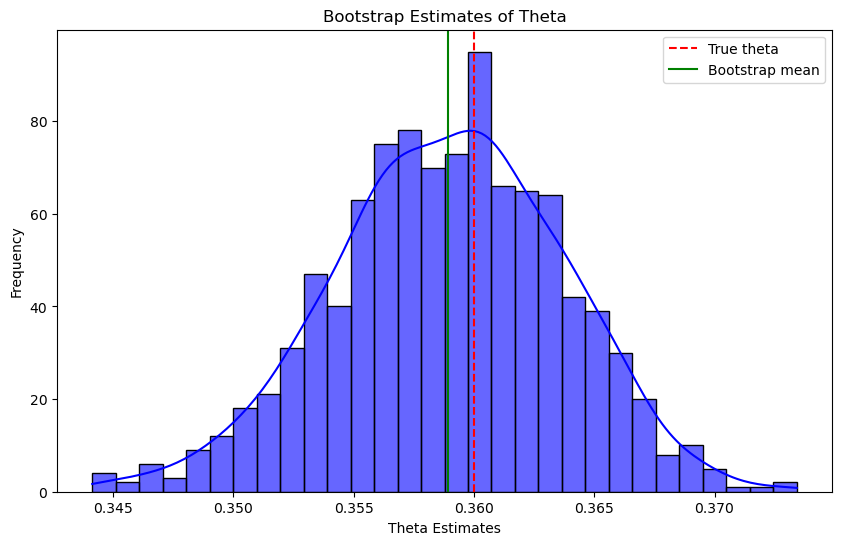

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_thetas, bins=30, kde=True, color='blue', alpha=0.6)
plt.axvline(x=theta_hat, color='red', linestyle='--', label='True theta')
plt.axvline(x=theta_mean, color='green', linestyle='-', label='Bootstrap mean')
plt.title('Bootstrap Estimates of Theta')
plt.xlabel('Theta Estimates')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The **bootstrap** is an extremely powerful technique for estimating the uncertainty in statistical estimates. It can be applied in cases where the true variability is difficult to estimate and allows us to generate **confidence intervals** and **standard errors** without needing multiple independent datasets. This makes it highly valuable in a wide range of statistical learning applications.

<h1 style="font-size:50px; color:black;">Model Selection</h1>

### Extensions of the Linear Model

In a typical **regression setting**, the **standard linear model** is used to describe the relationship between a **response variable $Y$** and a set of **predictor variables $X_1, X_2, \dots, X_p$**. The model is expressed as:

$$
Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon
$$

where:
- $Y$ is the response variable,
- $X_1, X_2, \dots, X_p$ are the predictor variables,
- $\beta_0, \beta_1, \dots, \beta_p$ are the coefficients (parameters) to be estimated,
- $\epsilon$ is the error term.

Previous lecture, we saw that this model is usually fit using **least squares**. From now on, we will explore some methods for extending the linear model to address limitations and improve both **prediction accuracy** and **model interpretability**.

---

### Why Use Alternatives to Least Squares?

There are two main reasons why we might want to use alternative fitting procedures instead of least squares:

#### 1. **Prediction Accuracy**
- If the true relationship between the response and predictors is approximately **linear**, least squares will yield **low bias**.
- When the number of observations $n$ is **much larger** than the number of predictors $p$, least squares also results in **low variance** and performs well on test data.
- However, when $n$ is **not much larger** than $p$, least squares can suffer from **high variance**, leading to overfitting and poor predictions on test data.
- In cases where $p > n$ (more predictors than observations), there is **no unique least squares solution**, leading to poor performance on the test set.
  
**Solution**: By constraining or **shrinking** the coefficients (also known as **regularization**), we can reduce variance at the cost of a small increase in bias. This often improves prediction accuracy for future observations.

#### 2. **Model Interpretability**
- In many cases, some of the variables included in the model may not be associated with the response, making the model unnecessarily complex.
- Removing irrelevant variables (i.e., setting the corresponding coefficients to zero) simplifies the model, making it easier to interpret.
  
**Problem**: Least squares rarely results in **exactly zero** coefficient estimates, making automatic feature selection difficult.

**Solution**: Alternative methods can automatically perform **feature selection** or **variable selection**, excluding irrelevant predictors from the model.

---

### Alternative Methods to Least Squares

There are several alternative methods, both classical and modern, for fitting the linear model. In this chapter, we will explore three important classes of methods:

#### 1. **Subset Selection**
- **Goal**: Identify a **subset** of the $p$ predictors that are most related to the response.
- **Method**: Fit the linear model using least squares, but only on the **reduced set** of selected predictors.
- **Advantage**: Simplifies the model by excluding irrelevant predictors.
  
#### 2. **Shrinkage (Regularization)**
- **Goal**: Fit a model using **all $p$ predictors**, but shrink the estimated coefficients towards zero.
- **Method**: Regularization techniques like **Ridge Regression** or **Lasso** shrink the coefficients to reduce **variance**.
- **Key Feature**: Some shrinkage methods (like Lasso) can result in some coefficients being **exactly zero**, thereby performing both regularization and **variable selection**.
- **Advantage**: Reduces overfitting by controlling the model complexity, especially when $p$ is large relative to $n$.

#### 3. **Dimension Reduction**
- **Goal**: Reduce the number of predictors by projecting the $p$ predictors into a lower-dimensional space (an $M$-dimensional subspace, where $M < p$).
- **Method**: Compute **linear combinations** (projections) of the predictors, and use these projections as new predictors in the regression model.
- **Advantage**: Reduces the dimensionality of the problem, simplifying the model while retaining most of the information.

---


<h1 style="font-size:50px; color:black;">Subset Selection</h1>

### Best Subset Selection

**Best subset selection** is a method for choosing the best subset of predictors in a regression model. It involves fitting a least squares regression model for **every possible combination** of the $p$ predictors and selecting the best one.

---

#### Steps in Best Subset Selection

1. **Null Model**: Start with $M_0$, the null model, which contains no predictors and simply predicts the sample mean for each observation.

<br>

2. **Fit Models for Each Subset Size**:
   - For each $k = 1, 2, \dots, p$, fit all $\binom{p}{k}$ models that contain exactly $k$ predictors.
   - Among these models, select the one with the **smallest RSS** (Residual Sum of Squares) or the **largest $R^2$**.

<br>
   
3. **Select the Best Model**: 
   - Among $M_0, M_1, \dots, M_p$, choose the best model using one of the following criteria:
     - **Validation set error**
     - **$C_p$ (Mallows’ $C_p$)**, **AIC (Akaike Information Criterion)**, or **BIC (Bayesian Information Criterion)**
     - **Adjusted $R^2$**
     - **Cross-validation** (average validation error across folds)

---



In [57]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [58]:
from itertools import combinations

X = data.drop(columns=['mpg','name'])  # Drop the 'mpg','name' column to get the predictors
y = data['mpg']  # Get the target 'mpg' and reshape

In [59]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [60]:
# Train-test split function
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)  # Set seed for reproducibility
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)  # Shuffle the indices
    split_idx = int(n_samples * (1 - test_size))  # Split index for train-test split
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]  # Get train and test indices
    return X.loc[train_idx], X.loc[test_idx], y.loc[train_idx], y.loc[test_idx]

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Best Subset Selection

def best_subset_selection(X, y):

    n_samples, n_predictors = X.shape  # number of samples and predictors
    best_models = []  # to store best models for each k

    # Iterate over the number of predictors in the model (from 1 to p)
    for k in range(1, n_predictors + 1):
        best_score = np.inf
        best_subset = None
        best_coefficients = None

        # Iterate over all combinations of k predictors
        for combo in combinations(X.columns, k):
            X_subset = X[list(combo)]
            # Compute the least squares solution using the Normal Equation
            coefficients = np.linalg.inv(X_subset.T.dot(X_subset)).dot(X_subset.T).dot(y)
            y_pred = X_subset.dot(coefficients)
            
            # Score
            # Calculate RSS (Residual Sum of Squares)
            residuals = y - y_pred
            rss = np.sum(residuals ** 2)

            if rss < best_score:
                best_score = rss
                best_subset = combo
                best_coefficients = coefficients

        best_models.append((best_subset, best_coefficients, best_score))

    return best_models

In [64]:
# Perform Best Subset Selection
best_models = best_subset_selection(X_train, y_train)
best_models

[(('acceleration',), array([1.48952183]), 15318.70092308766),
 (('weight', 'year'), array([-0.00687948,  0.57790204]), 3996.849819222067),
 (('weight', 'year', 'origin'),
  array([-0.00640402,  0.53929942,  0.95506971]),
  3875.3919394679674),
 (('horsepower', 'weight', 'year', 'origin'),
  array([-0.02085778, -0.00548583,  0.52952198,  1.07580882]),
  3829.6943123956253),
 (('displacement', 'horsepower', 'weight', 'year', 'origin'),
  array([ 0.01193412, -0.03175382, -0.0063059 ,  0.54210135,  1.26593364]),
  3789.2078887237553),
 (('cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin'),
  array([-0.79371588,  0.02409379, -0.03376153, -0.00612985,  0.56309901,
          1.31176133]),
  3733.1573204242004),
 (('cylinders',
   'displacement',
   'horsepower',
   'weight',
   'acceleration',
   'year',
   'origin'),
  array([-0.79238577,  0.02393849, -0.03441873, -0.00609651, -0.00908571,
          0.56483534,  1.31275303]),
  3733.0731066767557)]

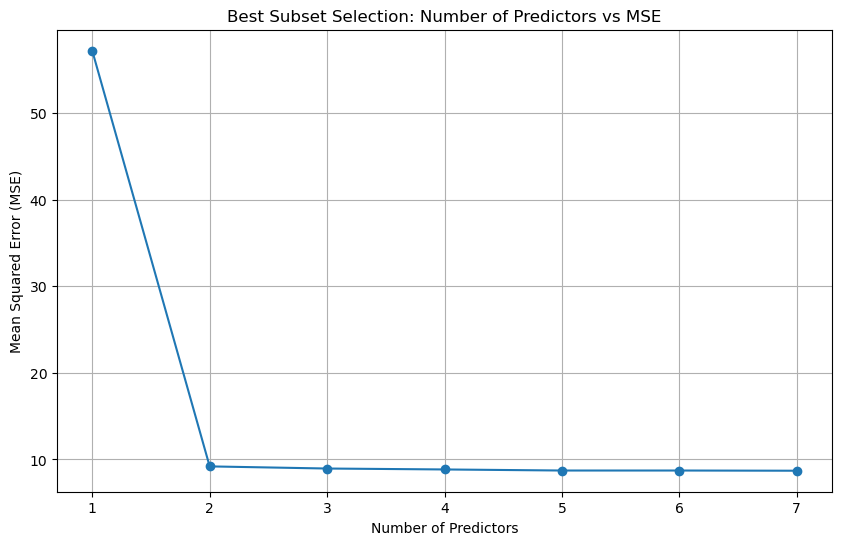

In [65]:
best_model_test_mse = []
for subset, coefficients, rss in best_models:
    X_test_subset = X_test[list(subset)]  # Subset of the test data using the selected features
    y_pred = X_test_subset.dot(coefficients)  # Predicted values
    mse = np.mean((y_test - y_pred) ** 2)  # Mean Squared Error (MSE)
    best_model_test_mse.append(mse)

# Plot MSE vs number of predictors
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(best_model_test_mse) + 1), best_model_test_mse, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Best Subset Selection: Number of Predictors vs MSE')
plt.grid(True)
plt.show()


### Forward Stepwise Selection

**Forward stepwise selection** is a computationally efficient alternative to best subset selection. Instead of evaluating all $2^p$ models, forward stepwise selection builds models sequentially by adding one predictor at a time.

#### Steps in Forward Stepwise Selection:

1. **Null Model**: Start with the null model $M_0$ (no predictors).

<br>

2. **Add Predictors**:
   - For $k = 0, 1, \dots, p - 1$:
     - Consider adding one predictor to the model $M_k$ from the remaining set of $p - k$ predictors.
     - Choose the predictor that minimizes the **RSS** or maximizes the **$R^2$**.
     - Update the model to $M_{k+1}$ with this added predictor.

<br>

3. **Select the Best Model**:
   - Use the same criteria as in best subset selection: validation set error, $C_p$, AIC, BIC, adjusted $R^2$, or cross-validation.

---

In [66]:
# Forward Stepwise Selection
def forward_stepwise_selection(X, y):
    
    remaining_predictors = list(X.columns)  # List of remaining predictors
    selected_predictors = []  # List to store selected predictors
    current_score = np.inf
    best_models = []  # Store models as we add predictors

    # While there are predictors left to add
    while remaining_predictors:
        best_score = np.inf
        best_candidate = None
        best_coefficients = None

        # Try adding each remaining predictor and compute the score (RSS)
        for candidate in remaining_predictors:
            X_subset = X[selected_predictors + [candidate]]  # Select current predictors + candidate
            # Compute coefficients using the normal equation
            coefficients = np.linalg.inv(X_subset.T.dot(X_subset)).dot(X_subset.T).dot(y)
            y_pred = X_subset.dot(coefficients)
            residuals = y - y_pred
            rss = np.sum(residuals ** 2)  # Residual Sum of Squares (RSS)

            if rss < best_score:
                best_score = rss
                best_candidate = candidate
                best_coefficients = coefficients

        # If the score improves, update the selected predictors and model
        if best_score < current_score:
            remaining_predictors.remove(best_candidate)
            selected_predictors.append(best_candidate)
            current_score = best_score
            best_models.append((selected_predictors.copy(), best_coefficients, best_score))

    return best_models

In [67]:
# Perform Forward Stepwise Selection
forward_models = forward_stepwise_selection(X_train, y_train)

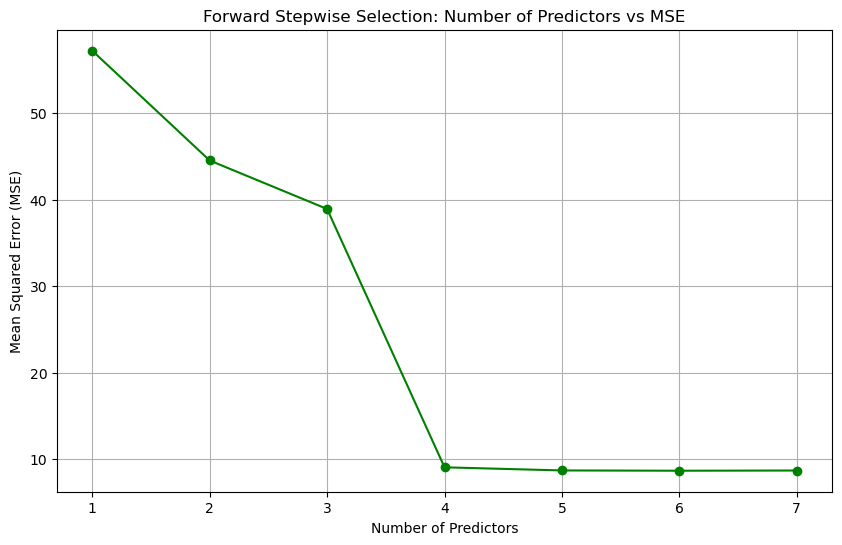

In [68]:
forward_model_test_mse = []
for selected_predictors, coefficients, _ in forward_models:
    X_test_subset = X_test[selected_predictors]
    y_pred = X_test_subset.dot(coefficients)  # Predicted values
    mse = np.mean((y_test - y_pred) ** 2)  # Mean Squared Error (MSE)
    forward_model_test_mse.append(mse)

# Plot MSE vs number of predictors for Forward Stepwise Selection
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(forward_models) + 1), forward_model_test_mse, marker='o', color='green')
plt.xlabel('Number of Predictors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Forward Stepwise Selection: Number of Predictors vs MSE')
plt.grid(True)
plt.show()

---

#### Key Points:

- **Monotonicity of RSS and $R^2$**: RSS always decreases, and $R^2$ always increases as more predictors are added. However, these statistics reflect training error, not test error, so we should select models based on **test error** (via validation error, cross-validation, AIC, BIC, etc.).
  
- **High Dimensionality**: The number of models to evaluate grows exponentially as $p$ increases:
  - For $p = 10$, there are about 1,000 possible models.
  - For $p = 20$, there are over **one million** models.
  - This makes best subset selection computationally infeasible for large $p$.

- **Logistic Regression**: For logistic regression, the best subset selection method uses **deviance** (a measure related to the maximized log-likelihood) instead of RSS to select the best model.

---

#### Limitations of Best Subset Selection

- **Computational Limitations**: Best subset selection becomes impractical when $p$ is large (e.g., $p \geq 40$), even with fast computers. Specialized techniques like **branch-and-bound** can reduce the number of models considered but have limitations and only work with **linear regression**.
- **Forward Stepwise Selection** offers a more computationally feasible alternative by building models iteratively, but it might not find the absolute best model.

---

<h1 style="font-size:50px; color:black;">Model Evaluation Metrics</h1>

When selecting a regression or classification model, it's essential to evaluate the model's performance to ensure it generalizes well to new data. Below are explanations of common metrics and criteria: **$R^2$, adjusted $R^2$, validation error, cross-validation, AIC, BIC, and deviance**.

---


In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = forward_models[4]
coefficients = model[1]
X_test_subset = X_test[model[0]]
X_train_subset = X_train[model[0]]

y_pred_train = X_train_subset.dot(coefficients)
y_pred_test = X_test_subset.dot(coefficients)

### 1. **$R^2$ (R-squared)**

- **Definition**: $R^2$ is the **coefficient of determination**, which measures the proportion of variance in the dependent variable ($Y$) that is predictable from the independent variables ($X_1, X_2, \dots, X_p$).
  
- **Formula**:
  $$
  R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
  $$
  Where:
  - **RSS** is the **Residual Sum of Squares** (the sum of squared differences between observed and predicted values).
  - **TSS** is the **Total Sum of Squares** (the sum of squared differences between observed values and their mean).

- **Interpretation**: 
  - $R^2$ ranges from 0 to 1.
  - $R^2 = 1$ means the model perfectly explains the variability in the response variable.
  - $R^2 = 0$ means the model explains none of the variability in the response.

- **Limitations**: 
  - $R^2$ always increases as more predictors are added, even if those predictors do not improve the model, leading to overfitting.

---

In [70]:
def r_squared(y_true, y_pred):
    ssr = np.sum((y_true - y_pred) ** 2)  # Residual Sum of Squares
    tss = np.sum((y_true - np.mean(y_true)) ** 2)  # Total Sum of Squares
    return 1 - ssr / tss

R2_train = r_squared(y_train, y_pred_train)
R2_test = r_squared(y_test, y_pred_test)

print(R2_train, R2_test)

0.8020998100587649 0.8425688238860504


### 2. **Adjusted $R^2$**

- **Definition**: Adjusted $R^2$ adjusts $R^2$ for the number of predictors in the model. It penalizes the inclusion of irrelevant predictors.

- **Formula**:
  $$
  \text{Adjusted } R^2 = 1 - \left( \frac{\text{RSS}/(n - p - 1)}{\text{TSS}/(n - 1)} \right)
  $$

  Where:
  - $n$ is the number of observations.
  - $p$ is the number of predictors.

- **Interpretation**: 
  - Adjusted $R^2$ increases only if the new predictor improves the model.
  - It can decrease if the added predictor worsens the model.

- **Benefit**: Helps prevent overfitting by accounting for the number of predictors, making it better than $R^2$ for comparing models with different numbers of predictors.

---

In [71]:
def adjusted_r_squared(y_true, y_pred, n, p):
    r2 = r_squared(y_true, y_pred)
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

n, p = X_train.shape
adj_R2_train = adjusted_r_squared(y_train, y_pred_train, n, p)
print(adj_R2_train)

0.7975578384863431


### 3. **Validation Error**

- **Definition**: Validation error is the error measured on a **validation set** (data not used in training). The validation error is often measured using **Mean Squared Error (MSE)**:
  
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

  Where $y_i$ are the true values and $\hat{y}_i$ are the predicted values.

- **Usage**: The validation set helps assess how well the model generalizes to unseen data.

- **Interpretation**: A lower validation error suggests better model generalization. A very low training error combined with a high validation error indicates overfitting.

---


In [72]:
model

(['acceleration', 'origin', 'weight', 'year', 'horsepower'],
 array([-0.06451562,  1.09865821, -0.00531282,  0.54311092, -0.02642297]),
 3825.1793369906063)

In [73]:
def cross_validation(X, y, k=5):
    n_samples = X.shape[0]
    fold_size = n_samples // k
    mse_scores = []

    for i in range(k):
        # Generate train/val splits
        val_idx = np.arange(i * fold_size, (i + 1) * fold_size)
        train_idx = np.setdiff1d(np.arange(n_samples), val_idx)
        
        X_train_cv, X_val_cv = X.loc[train_idx], X.loc[val_idx]
        y_train_cv, y_val_cv = y.loc[train_idx], y.loc[val_idx]
        
        # Train model on training data
        coefficients = model[1]

        y_pred_cv = X_val_cv.dot(coefficients)
        
        # Calculate MSE on validation data
        mse = np.mean((y_val_cv - y_pred_cv)**2)
        mse_scores.append(mse)    
    return np.mean(mse_scores)

cv_mse = cross_validation(X[model[0]], y, k=5)
cv_mse

11.544702297796945

### 4. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)

**AIC** and **BIC** are popular model selection criteria that balance **goodness of fit** with **model complexity**. While these criteria are commonly used for linear regression, they can also be applied more generally to models fitted using **Maximum Likelihood Estimation (MLE)**.

---

### AIC (Akaike Information Criterion)

- **General Definition**: AIC is a measure of the relative quality of a statistical model for a given dataset. It compares models based on their likelihoods, penalizing models that use more parameters to avoid overfitting.
  
- **AIC Formula (General MLE)**:
  
  $$
  \text{AIC} = -2 \log(L) + 2p
  $$
  
  Where:
  - $L$ is the **likelihood** of the model, i.e., the probability of the observed data given the model.
  - $p$ is the number of parameters in the model.

  The **$-2 \log(L)$** term measures how well the model fits the data, while the **$2p$** term penalizes models with more parameters.

- **Interpretation**:
  - **Lower AIC** values indicate a better model when comparing models fitted to the same data.
  - AIC penalizes models with more parameters to prevent overfitting, balancing complexity with fit.

#### AIC in Linear Regression

For linear regression models with **Gaussian errors**, the maximum likelihood solution is equivalent to the **least squares solution**. In this context, AIC can be written as:

$$
\text{AIC} = \frac{1}{n} \left( \text{RSS} + 2d \hat{\sigma}^2 \right)
$$

Where:
- **RSS** is the Residual Sum of Squares.
- **$d$** is the number of predictors (parameters) in the model.
- **$\hat{\sigma}^2$** is an estimate of the variance of the errors.
- **$n$** is the number of observations.

---

### BIC (Bayesian Information Criterion)

- **General Definition**: BIC is derived from a **Bayesian** perspective and is used to compare models by balancing fit and complexity. Like AIC, BIC penalizes models with more parameters but uses a stricter penalty, especially for large datasets.
  
- **BIC Formula (General MLE)**:
  
  $$
  \text{BIC} = -2 \log(L) + p \log(n)
  $$
  
  Where:
  - $L$ is the **likelihood** of the model.
  - $p$ is the number of parameters in the model.
  - $n$ is the number of observations.

  The **$p \log(n)$** term penalizes models with more parameters, and the penalty grows with the size of the dataset.

- **Interpretation**:
  - **Lower BIC** values indicate a better model.
  - BIC applies a **harsher penalty** for model complexity than AIC, favoring **simpler models** when the sample size is large.

#### BIC in Linear Regression

For linear regression models with Gaussian errors, BIC is written as:

$$
\text{BIC} = \frac{1}{n} \left( \text{RSS} + \log(n) d \hat{\sigma}^2 \right)
$$

Where:
- **RSS** is the Residual Sum of Squares.
- **$d$** is the number of predictors in the model.
- **$\hat{\sigma}^2$** is the estimate of the error variance.
- **$n$** is the number of observations.

Since **$\log(n) > 2$** for any **$n > 7$**, BIC imposes a **heavier penalty** on models with more parameters compared to AIC, especially when the dataset is large.

---

### Comparison: AIC vs. BIC

- **AIC**: 
  - Focuses on model fit but penalizes complexity with **$2p$**.
  - Suitable when the goal is to minimize prediction error, regardless of the true model.
  - **Less conservative** than BIC in terms of selecting more complex models.

- **BIC**:
  - Imposes a stricter penalty using **$p \log(n)$**, which grows with the dataset size.
  - Assumes that the **true model** is among the candidates and tries to select the simplest model that adequately explains the data.
  - **More conservative**, favoring simpler models, especially with large datasets.

---

In [74]:
# AIC calculation
def aic(y_true, y_pred, n, d, sigma2):
    rss = np.sum((y_true - y_pred)**2)
    aic_value = (rss / n) + 2 * d * sigma2
    return aic_value

# BIC calculation
def bic(y_true, y_pred, n, d, sigma2):
    rss = np.sum((y_true - y_pred)**2)
    bic_value = (rss / n) + np.log(n) * d * sigma2
    return bic_value

In [75]:
# Estimate variance of the errors (sigma^2)
n_train = len(y_train)
d = X_train.shape[1]  # Number of predictors
sigma2 = np.var(y_train - y_pred_train)

# Calculate AIC and BIC
aic_value = aic(y_train, y_pred_train, n_train, d, sigma2)
bic_value = bic(y_train, y_pred_train, n_train, d, sigma2)

print(f"AIC: {aic_value:.4f}")
print(f"BIC: {bic_value:.4f}")

AIC: 183.3033
BIC: 503.7578


---

### Summary of Metrics

| **Metric**         | **What It Measures**                                                   | **Best When**                     |
|--------------------|-----------------------------------------------------------------------|-----------------------------------|
| **$R^2$**          | Proportion of variance explained by the model.                        | Comparing models with the same predictors. |
| **Adjusted $R^2$** | Adjusts $R^2$ for the number of predictors, penalizing unnecessary ones. | Comparing models with different numbers of predictors. |
| **Validation Error**| Error on a separate validation set, indicating generalization error.   | Evaluating model performance on unseen data. |
| **Cross-Validation**| Average error across multiple training/validation splits.             | Reducing variance in error estimates. |
| **AIC**            | Balances model fit with complexity (penalizes large models).           | Comparing models on the same dataset, less strict than BIC. |
| **BIC**            | Stricter penalty on model complexity than AIC.                        | When model simplicity is critical, or with large datasets. |

Each of these metrics provides different insights into model performance. Choosing the right one depends on the problem, dataset size, and need to balance model accuracy with complexity.


<h1 style="font-size:50px; color:black;">Shrinkage Method</h1>

### Ridge Regression and Lasso: Shrinking Regression Coefficients

The subset selection methods involve using **least squares (Score metric)** to fit a linear model with a subset of the predictors. However, an alternative approach involves fitting a model with **all $p$ predictors** while constraining or **regularizing** the coefficient estimates, or equivalently, shrinking the coefficients towards zero.

It may not be immediately clear why such shrinkage can improve the model, but it turns out that **shrinking the coefficients** can significantly reduce their variance, which leads to better model performance, especially in the presence of multicollinearity or when $p$ is large compared to $n$.

The two best-known techniques for shrinking the regression coefficients are **Ridge Regression** and the **Lasso**.

---

### Ridge Regression

#### Ridge Regression Overview

**Ridge regression** is a technique that modifies the **least squares** approach by adding a **penalty** to the size of the coefficients, shrinking them towards zero. This method is especially useful when predictors are highly correlated or when the number of predictors is large.

- **Objective in Least Squares**: Recall from OLS that the least squares estimates the coefficients $\beta_0, \beta_1, \dots, \beta_p$ by minimizing the **Residual Sum of Squares (RSS)**:
  
  $$
  \text{RSS} = \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2
  $$

- **Objective in Ridge Regression**: Ridge regression estimates the coefficients $\hat{\beta}^{R}$ by minimizing a slightly modified version of RSS:
  
  $$
  \text{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2
  $$

  Where:
  - $\lambda \geq 0$ is a **tuning parameter** that controls the strength of the penalty.
  - The second term, $\lambda \sum_{j=1}^{p} \beta_j^2$, is called the **shrinkage penalty** or **$L_2$ penalty**. It penalizes large coefficients, encouraging them to shrink towards zero.

---

#### Understanding the Penalty Term

- The **first term** in the ridge regression objective function is the usual **RSS**, which measures how well the model fits the data.
- The **second term**, $\lambda \sum_{j=1}^{p} \beta_j^2$, shrinks the coefficients by adding a penalty for large values of $\beta_j$.
  
  - When $\lambda = 0$, ridge regression is equivalent to **least squares**.
  - As $\lambda$ increases, the magnitude of the coefficients $\beta_j$ is reduced, shrinking them towards zero.

---

#### Effect of the Tuning Parameter $\lambda$

- **Tuning Parameter ($\lambda$)**: The value of $\lambda$ controls the balance between **fitting the data well** and **shrinking the coefficients**.
  - For **$\lambda = 0$**, there is no penalty, and the ridge regression estimates are identical to the least squares estimates.
  - As **$\lambda \to \infty$**, the coefficients shrink towards zero, resulting in a model that may be overly simplistic.
  
- **Multiple Sets of Coefficients**: Unlike least squares, which produces a single set of coefficient estimates, ridge regression produces **different sets of estimates** for different values of $\lambda$.

---

#### Ridge Regression Without Shrinking the Intercept

In the ridge regression formula, the shrinkage penalty is applied only to the coefficients $\beta_1, \dots, \beta_p$, **not to the intercept $\beta_0$**. The reasoning is that the intercept represents the **mean response** when all predictors are zero, and shrinking it would not improve the model's performance. 

If the data matrix $X$ is centered (i.e., the columns have been adjusted to have mean zero), then the intercept can be estimated as:

$$
\hat{\beta_0} = \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

This intercept represents the average value of $y$ when all predictors are zero.

---

In [76]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [77]:
# Drop the 'mpg','year','name' column to get the predictors
X = data.drop(columns=['mpg','year','name'])
y = data['mpg']               # Get the target 'mpg'

#### The Need for Standardization in Ridge Regression

One important consideration in ridge regression is **scaling** the predictors. Unlike least squares, which is **scale equivariant** (i.e., rescaling a predictor simply scales the coefficient), ridge regression is **not scale equivariant**. This is because ridge regression includes a penalty term that depends on the sum of squared coefficients:

$$
\lambda \sum_{j=1}^{p} \beta_j^2
$$

This term can cause ridge regression estimates to vary substantially depending on the scale of the predictors. Therefore, it is necessary to **standardize** the predictors so that they are all on the same scale. This is done by centering and scaling each predictor as follows:

$$
\tilde{x}_{ij} = \frac{x_{ij}-\bar{x_j}}{\sqrt{\sum_{i=1}^{n} \frac{1}{n}({x_{ij} - \bar{x_j})^2}}}
$$

Where the denominator is the estimated standard deviation of the $j$-th predictor. As a result, all standardized predictors will have a standard deviation of 1, making the final ridge regression fit independent of the original scale of the predictors.

In [78]:
def standardize(X):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0, ddof=1)  # Use ddof=1 for sample standard deviation
    return (X - mean_X) / std_X

# Apply the standardization
X_standardized = standardize(X)
X_standardized.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-0.715726
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-0.715726
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-0.715726
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-0.715726
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-0.715726


In [79]:
X_standardized.describe()

,cylinders,displacement,horsepower,weight,acceleration,origin
count,3.920000e+02,3.920000e+02,3.920000e+02,392.000000,3.920000e+02,3.920000e+02
mean,-5.437827e-17,-7.250436e-17,-1.631348e-16,0.000000,4.531523e-16,2.718914e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.449152e+00,-1.208019e+00,-1.519034e+00,-1.606522,-2.733490e+00,-7.157264e-01
25%,-8.629108e-01,-8.544397e-01,-7.656144e-01,-0.885722,-6.402369e-01,-7.157264e-01
50%,-8.629108e-01,-4.148541e-01,-2.849846e-01,-0.204949,-1.497955e-02,-7.157264e-01
75%,1.482053e+00,7.772830e-01,5.593651e-01,0.750134,5.377842e-01,5.257105e-01
max,1.482053e+00,2.490234e+00,3.261284e+00,2.545808,3.355973e+00,1.767147e+00


### Normal Equation for Ridge Regression

In **linear regression**, the coefficient estimates $\hat{\beta}$ are obtained by minimizing the **Residual Sum of Squares (RSS)**, which leads to the following **normal equation**:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

Where:
- $X$ is the matrix of predictors.
- $y$ is the vector of responses.
- $\hat{\beta}$ is the vector of coefficient estimates.

For **ridge regression**, the objective function adds a penalty term to the RSS, specifically:

$$
\text{Ridge Objective} = \text{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2
$$

This leads to a modified **normal equation** for ridge regression:

$$
\hat{\beta}^R = (X^TX + \lambda I)^{-1}X^Ty
$$

Where:
- $I$ is the **identity matrix** of size $p \times p$.
- $\lambda$ is the **tuning parameter** that controls the amount of shrinkage applied to the coefficients.


<h3 style = "color:red">Deriving the Normal Equation</h3>

In ridge regression, the goal is to minimize the sum of the **Residual Sum of Squares (RSS)** and the **$L_2$ penalty** on the coefficients. Let’s derive the normal equation for ridge regression step by step.

### Step 1: Ridge Regression Objective Function

The objective function for ridge regression combines the **RSS** and a penalty term on the coefficients. The function to minimize is:

$$
\text{Ridge Objective} = (y - X\beta)^T (y - X\beta) + \lambda \beta^T \beta
$$

Where:
- $X$ is the matrix of predictors ($n \times p$),
- $\beta$ is the vector of coefficients ($p \times 1$),
- $y$ is the vector of observed responses ($n \times 1$),
- $\lambda$ is the regularization parameter that controls the strength of the penalty.

### Step 2: Expand the Objective Function

We expand the objective function as follows:

$$
(y - X\beta)^T (y - X\beta) = y^T y - 2 \beta^T X^T y + \beta^T X^T X \beta
$$

Thus, the full ridge regression objective function becomes:

$$
\text{Ridge Objective} = y^T y - 2 \beta^T X^T y + \beta^T X^T X \beta + \lambda \beta^T \beta
$$

Where $\lambda \beta^T \beta$ represents the $L_2$ penalty term that shrinks the coefficients.

### Step 3: Take the Derivative with Respect to $\beta$

Next, we compute the derivative of the objective function with respect to $\beta$. Each term is differentiated as follows:

- The derivative of $y^T y$ with respect to $\beta$ is **0** (since this term does not involve $\beta$).
- The derivative of $-2 \beta^T X^T y$ with respect to $\beta$ is:
  $$
  -2 X^T y
  $$
- The derivative of $\beta^T X^T X \beta$ with respect to $\beta$ is:
  $$
  2 X^T X \beta
  $$
- The derivative of $\lambda \beta^T \beta$ with respect to $\beta$ is:
  $$
  2 \lambda \beta
  $$

Combining these, the full derivative is:

$$
\frac{\partial}{\partial \beta} \left[ y^T y - 2 \beta^T X^T y + \beta^T X^T X \beta + \lambda \beta^T \beta \right] = -2 X^T y + 2 X^T X \beta + 2 \lambda \beta
$$

### Step 4: Set the Derivative to Zero

To minimize the objective function, we set the derivative equal to zero:

$$
-2 X^T y + 2 X^T X \beta + 2 \lambda \beta = 0
$$

Dividing through by 2:

$$
-X^T y + X^T X \beta + \lambda \beta = 0
$$

Rearranging this equation:

$$
X^T X \beta + \lambda \beta = X^T y
$$

Factor out $\beta$:

$$
(X^T X + \lambda I) \beta = X^T y
$$

Where $I$ is the identity matrix.

### Step 5: Solve for $\beta$ (Normal Equation for Ridge Regression)

To solve for $\beta$, multiply both sides of the equation by the inverse of $(X^T X + \lambda I)$:

$$
\hat{\beta}^R = (X^T X + \lambda I)^{-1} X^T y
$$

This is the **normal equation** for ridge regression.

In [80]:
# Ridge regression function
def ridge_regression(X, y, lam):
    n_features = X.shape[1]
    I = np.eye(n_features)
    beta_ridge = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return beta_ridge

In [81]:
# Simulate training data for ridge regression
np.random.seed(42)
n_samples, n_features = 50, 45  # 50 observations, 45 features
X_train = np.random.randn(n_samples, n_features)
beta_true = np.array([3, 2, 1] + [0] * (n_features - 3))  # True coefficients for simulation
y_train = X_train.dot(beta_true) + np.random.randn(n_samples) * 0.1  # Adding noise

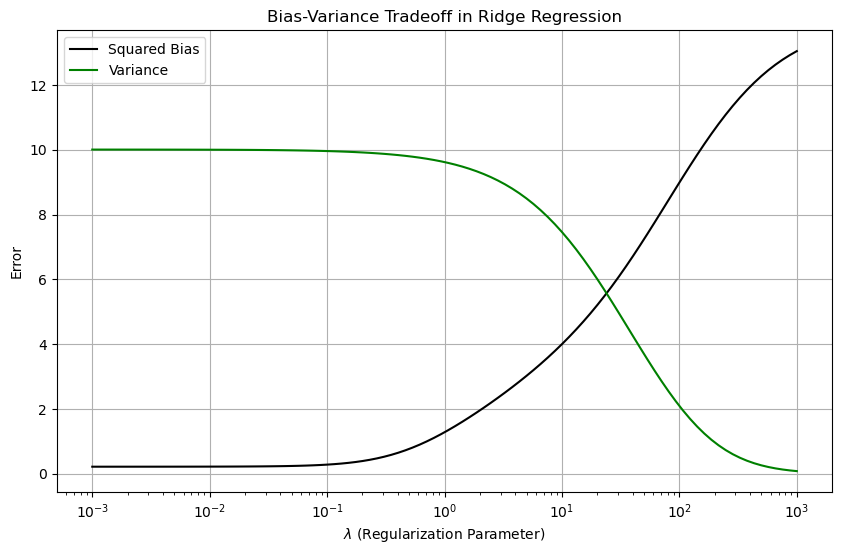

In [82]:
# Apply standardization to train set
X_train_standardized = standardize(X_train)

# List of lambda values
lambdas = np.logspace(-3, 3, 100)

# Store bias^2 and variance
bias_squared = []
variance = []

# Ridge regression for each lambda value
for lam in lambdas:
    beta_ridge = ridge_regression(X_train_standardized, y_train, lam)
    
    # Predictions on training set
    y_pred_train = X_train_standardized.dot(beta_ridge)
    
    # Bias^2: Squared difference between true coefficients and ridge coefficients
    bias_squared.append(np.sum((beta_true - beta_ridge) ** 2))
    
    # Variance: Variance of predictions on training set
    variance.append(np.var(y_pred_train))

# Convert lists to arrays
bias_squared = np.array(bias_squared)
variance = np.array(variance)

# Plot bias^2 and variance
plt.figure(figsize=(10, 6))

# Bias^2 (black line)
plt.plot(lambdas, bias_squared, color='black', label='Squared Bias')

# Variance (green line)
plt.plot(lambdas, variance, color='green', label='Variance')

# Plot details
plt.xscale('log')
plt.xlabel(r'$\lambda$ (Regularization Parameter)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff in Ridge Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [83]:
features = list(X.columns)
dict(zip(features, ridge_regression(X,y,10)))

{'cylinders': 1.6175684917516815,
 'displacement': -0.02970716086757636,
 'horsepower': 0.08644724151249741,
 'weight': -0.005806405573798674,
 'acceleration': 1.544212228550703,
 'origin': 2.7671194408603697}

In [84]:
n_features = X.shape[1]

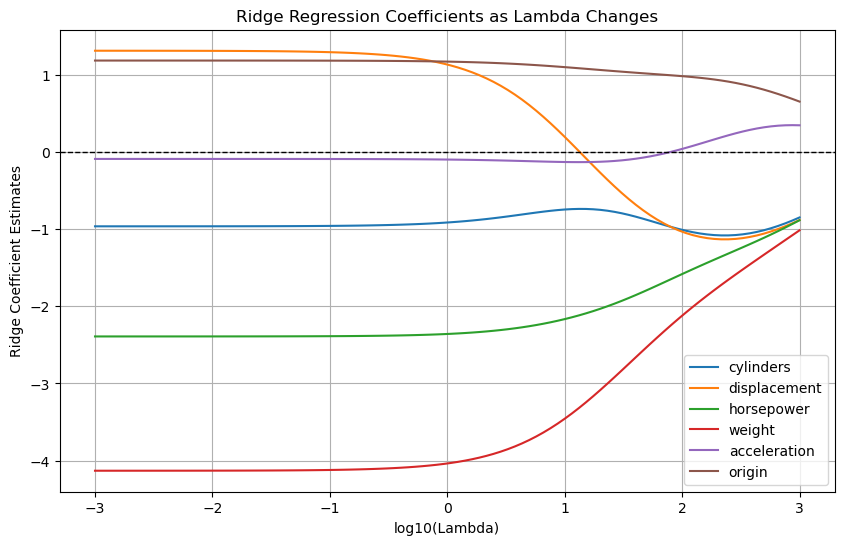

In [85]:
# List of lambda values to explore
lambdas = np.logspace(-3, 3, 100)  # Lambda values from 10^-3 to 10^3

# Store the coefficients for each lambda value
coefficients = []

# Perform ridge regression for each lambda value
for lam in lambdas:
    beta_ridge = ridge_regression(X_standardized, y, lam)
    coefficients.append(beta_ridge)

coefficients = np.array(coefficients)

# Plot Ridge coefficients for each lambda value
plt.figure(figsize=(10, 6))
for i in range(n_features):
    plt.plot(np.log10(lambdas), coefficients[:, i], label=f'{features[i]}')

plt.xlabel('log10(Lambda)')
plt.ylabel('Ridge Coefficient Estimates')
plt.title('Ridge Regression Coefficients as Lambda Changes')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Optimal $\lambda$

the minimum MSE occurs around $\lambda = 298.365$. Interestingly, the **least squares fit** (at $\lambda = 0$) has an high MSE

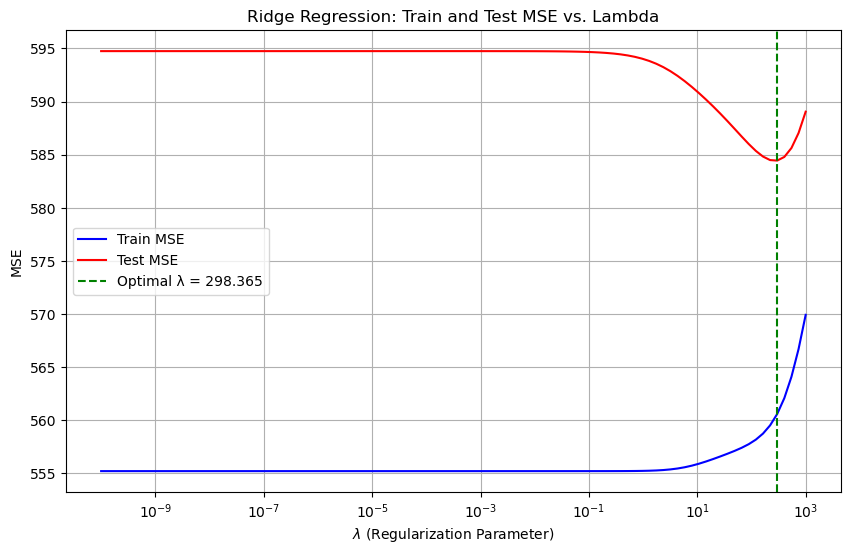

Optimal lambda (λ) value: 298.365


In [86]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.4, random_state=42)

# List of lambda values for regularization
lambdas = np.logspace(-10, 3, 100)

# To store the MSE for training and test sets
train_mse = []
test_mse = []

# Perform Ridge regression for each lambda value
for lam in lambdas:
    beta_ridge = ridge_regression(X_train, y_train, lam)  # Fit Ridge regression
    
    # Predictions on training and test sets
    y_pred_train = np.array(X_train).dot(beta_ridge)
    y_pred_test = np.array(X_test).dot(beta_ridge)
    
    # Compute MSE for training and test sets
    train_mse.append(np.mean((y_train - y_pred_train) ** 2))
    test_mse.append(np.mean((y_test - y_pred_test) ** 2))

# Find the lambda with the minimum test MSE
optimal_lambda_idx = np.argmin(test_mse)
optimal_lambda = lambdas[optimal_lambda_idx]

# Plot the train and test MSE vs. lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_mse, label='Train MSE', color='blue')
plt.plot(lambdas, test_mse, label='Test MSE', color='red')
plt.axvline(x=optimal_lambda, color='green', linestyle='--', label=f'Optimal λ = {optimal_lambda:.3f}')
plt.xscale('log')  # Logarithmic scale for lambda
plt.xlabel(r'$\lambda$ (Regularization Parameter)')
plt.ylabel('MSE')
plt.title('Ridge Regression: Train and Test MSE vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal lambda
print(f"Optimal lambda (λ) value: {optimal_lambda:.3f}")

In [87]:
dict(zip(features,ridge_regression(X_train, y_train, optimal_lambda)))

{'cylinders': -1.127383380399725,
 'displacement': -0.9825763748302717,
 'horsepower': -0.8491992870520717,
 'weight': -1.2216193169432792,
 'acceleration': 0.6157140526684786,
 'origin': 1.3458916065344615}

### Ridge Regression's Limitation

Ridge regression has an important disadvantage: it includes **all $p$ predictors** in the final model. While ridge regression shrinks the coefficients towards zero, it does not set any of them **exactly** to zero, unlike **best subset selection** or **stepwise methods**, which often lead to models with only a subset of the predictors. This lack of feature selection can make the model difficult to interpret, especially when the number of predictors is large.

### The Lasso

The **Lasso** (Least Absolute Shrinkage and Selection Operator) addresses this limitation by modifying the penalty in ridge regression. The lasso minimizes the following objective:

$$
\text{Lasso Objective} = \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Comparing the lasso to ridge regression:
- Ridge regression adds a **$L_2$ penalty** on the sum of squared coefficients:
  $$
  \lambda \sum_{j=1}^{p} \beta_j^2
  $$
- The **lasso** adds a **$L_1$ penalty** on the sum of the absolute values of the coefficients:
  $$
  \lambda \sum_{j=1}^{p} |\beta_j|
  $$

This **$L_1$ penalty** forces some coefficient estimates to be exactly zero when the tuning parameter $\lambda$ is sufficiently large, leading to **sparse models** that involve only a subset of the variables. In contrast to ridge regression, the lasso performs **feature selection**, making it easier to interpret.



### The Lasso's Variable Selection Property

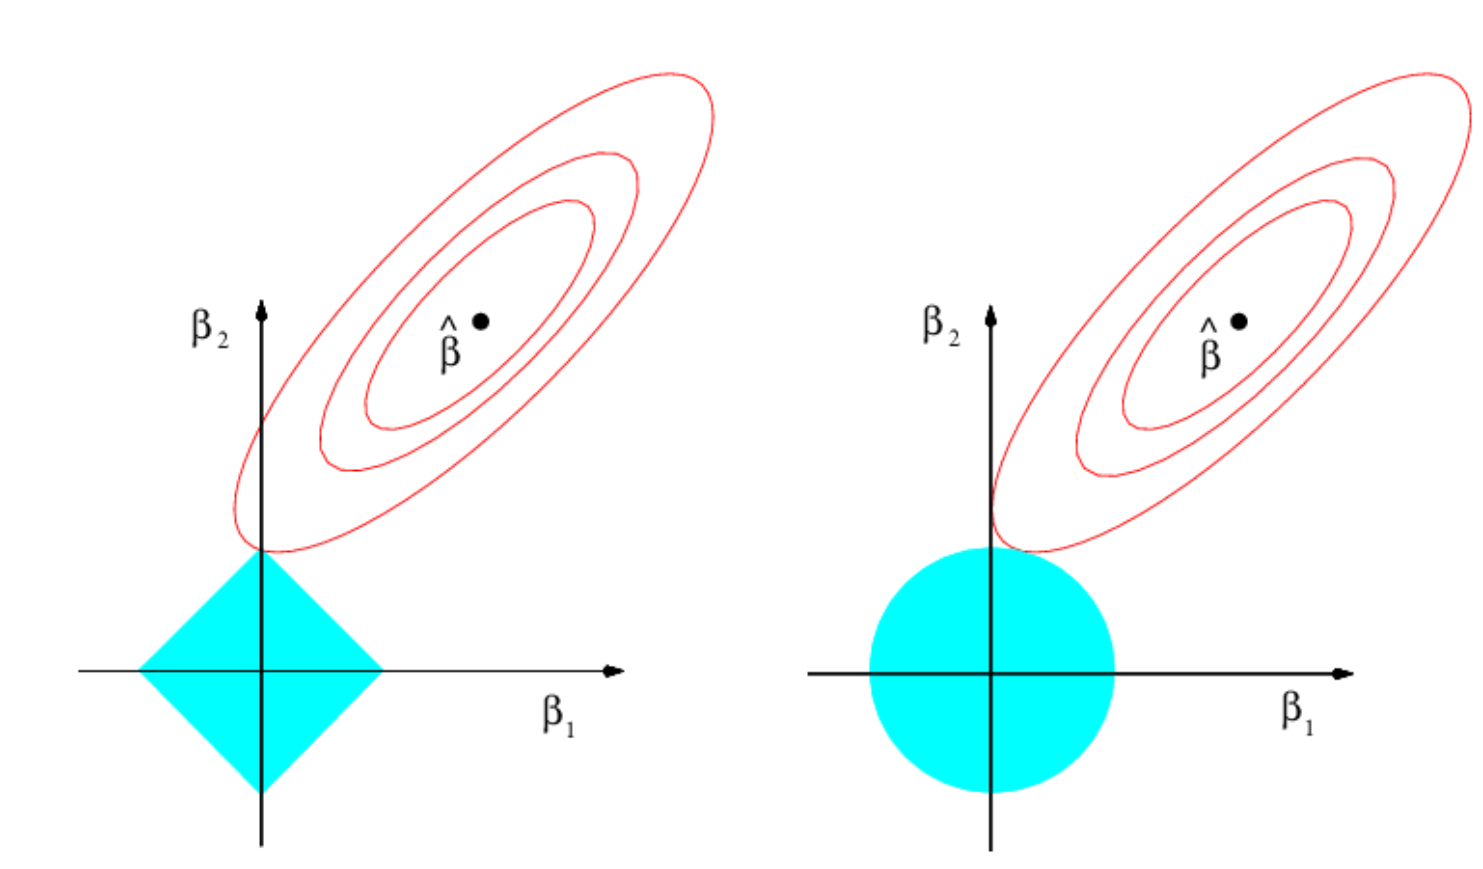

The key difference between lasso and ridge regression lies in the **geometry of the constraint regions**:

- **Ridge regression** shrinks coefficients without ever setting them exactly to zero, as it constrains the coefficients inside a **circle** (or hypersphere for more than two predictors).
- **Lasso** constrains the coefficients inside a **diamond-shaped region** (or a polytope in higher dimensions), which has corners. The sharp edges allow the solution to hit exactly zero, forcing some coefficients to be zero.

This behavior is depicted in the following constraint regions for **two predictors**:

- **Ridge regression** constraint:
  $$
  \sum_{j=1}^{p} \beta_j^2 \leq s
  $$
  (a circular constraint region)

- **Lasso** constraint:
  $$
  \sum_{j=1}^{p} |\beta_j| \leq s
  $$
  (a diamond-shaped constraint region)

Because of the sharp corners in the lasso constraint region, the lasso often sets some coefficients to zero, which explains why it performs **variable selection**.

### Comparing the Lasso and Ridge Regression

- **Ridge regression**: Includes all variables but shrinks the coefficients.
- **Lasso**: Selects a subset of variables by setting some coefficients exactly to zero.

The lasso provides more interpretable models but may not always provide better prediction accuracy than ridge regression. The performance of each method depends on the underlying data. Generally:
- **Lasso** performs better when only a small number of predictors have significant coefficients.
- **Ridge regression** performs better when many predictors contribute to the response, with coefficients of roughly equal size.

### Bias-Variance Trade-off

Similar to ridge regression, lasso provides a trade-off between **bias** and **variance**. As the tuning parameter $\lambda$ increases:
- The **variance** decreases because the model becomes less flexible.
- The **bias** increases as the coefficients shrink and some are set to zero.

This trade-off is important in both ridge regression and lasso, but lasso's variable selection ability provides a more interpretable model when many coefficients are small or zero.

### Summary

- **Lasso** introduces an $L_1$ penalty, which forces some coefficients to be exactly zero, performing feature selection.
- **Ridge regression** introduces an $L_2$ penalty, which shrinks the coefficients but does not set any of them to zero.
- Lasso is better suited for situations where only a small number of predictors are important, while ridge regression works well when many predictors contribute to the response.
- The choice between lasso and ridge regression depends on the specific data set, and cross-validation is often used to determine which method performs better.



## Lasso Regression Optimization


### Soft Thresholding and Coordinate Descent in Lasso Regression

Lasso regression is a regression technique that performs both variable selection and regularization by adding an $L_1$ penalty to the objective function. Two important concepts related to Lasso are **Soft Thresholding** and **Coordinate Descent**.

### 1. Soft Thresholding

Soft thresholding plays a crucial role in Lasso by either shrinking the coefficients or forcing them to be exactly zero. The objective function for Lasso regression can be written as:

$$
\min_{\beta} \left( \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right)
$$

Here, $\lambda$ is a regularization parameter that controls the size of the coefficients $\beta_j$, pushing some of them towards zero.

Soft thresholding is applied in the following manner: if the gradient for a certain coefficient is smaller than a threshold value $\lambda$, the coefficient is set to zero; otherwise, it is shrunk by $\lambda$. Mathematically, this is expressed as:

$$
S_{\lambda}(z) = \text{sign}(z) \cdot \max(|z| - \lambda, 0)
$$

Where:
- $z$ is the estimate of the coefficient,
- $\lambda$ is the penalty parameter,
- $\text{sign}(z)$ is the sign of $z$.

In Lasso regression, coefficients smaller than $\lambda$ are shrunk to zero, effectively performing variable selection, while the remaining coefficients are reduced in magnitude by the soft thresholding process.

### 2. Coordinate Descent

Coordinate Descent is an optimization algorithm used to solve the Lasso problem. It works by optimizing one coordinate (coefficient) at a time while keeping the other coefficients fixed. This is done iteratively until convergence. For each coefficient, it updates the value based on the current residuals and applies soft thresholding.

The steps involved in Coordinate Descent for Lasso are:
1. Initialize all coefficients $\beta_j$ to zero.
2. For each coefficient $\beta_j$, fix all other coefficients and update $\beta_j$.
3. Calculate the residuals for each feature and apply soft thresholding to update $\beta_j$.
4. Repeat the process for all features until convergence.

Coordinate Descent is well-suited for Lasso because it breaks down the problem into smaller, manageable updates and can efficiently handle large datasets.

## Algorithm

This implementation of Lasso regression uses the **Coordinate Descent** method to optimize the coefficients. The objective function for Lasso regression can be written as:

$$
\min_{\beta} \left( \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right)
$$

Where:
- $X \in \mathbb{R}^{n \times p}$ is the feature matrix with $n$ samples and $p$ features.
- $y \in \mathbb{R}^n$ is the target variable.
- $\lambda$ is the regularization parameter (penalty term).
- $\beta_j$ are the coefficients for each feature $j$.

### Algorithm Steps

1. **Initialization**: Start by initializing the coefficients $\beta$ to zero:
   $$
   \beta = \mathbf{0}_p
   $$

2. **Iterative Updates**: For each feature $j$, the residual is calculated by excluding the contribution of the current $\beta_j$:
   $$
   \text{residual} = y - \left( X \beta - X_j \beta_j \right)
   $$

   The coefficient $\beta_j$ is updated using **Soft Thresholding**:
   $$
   \rho_j = X_j^T \cdot \text{residual}
   $$
   
   Then apply the soft-thresholding function:
   $$
   \beta_j = \text{sign}(\rho_j) \cdot \max\left( |\rho_j| - \lambda, 0 \right) / \left( X_j^T X_j \right)
   $$

3. **Stopping Condition**: The algorithm checks if the coefficients have converged by calculating the change in $\beta$. The algorithm stops if the change is smaller than a predefined tolerance $\epsilon$:
   $$
   \sum_{j=1}^{p} |\beta_j^{(k)} - \beta_j^{(k-1)}| < \epsilon
   $$

### Summary
- **Soft Thresholding**: A method to set coefficients to zero when their magnitude is below a certain threshold ($\lambda$), or reduce their magnitude otherwise.
- **Coordinate Descent**: An optimization algorithm that updates each coefficient one by one using soft thresholding until the objective function converges.

Lasso regression combines these two techniques to produce a simple, interpretable model by shrinking unnecessary coefficients to zero.


In [88]:
import numpy as np

# Lasso regression function using coordinate descent
def lasso_regression(X, y, lam, max_iter=1000, tol=1e-6):
    n, p = X.shape
    X = np.array(X)
    y = np.array(y)
    
    beta = np.zeros(p)  # Initialize coefficients to zero
    for iteration in range(max_iter):
        beta_prev = beta.copy()
        for j in range(p):
            # Residual with all except j-th coefficient
            residual = y - (X @ beta - X[:, j] * beta[j])
            # Update beta_j using soft-thresholding
            rho = X[:, j].T @ residual
            beta[j] = np.sign(rho) * max(abs(rho) - lam, 0) / (X[:, j].T @ X[:, j])
        # Stopping condition based on tolerance
        if np.sum(np.abs(beta - beta_prev)) < tol:
            break
    return beta

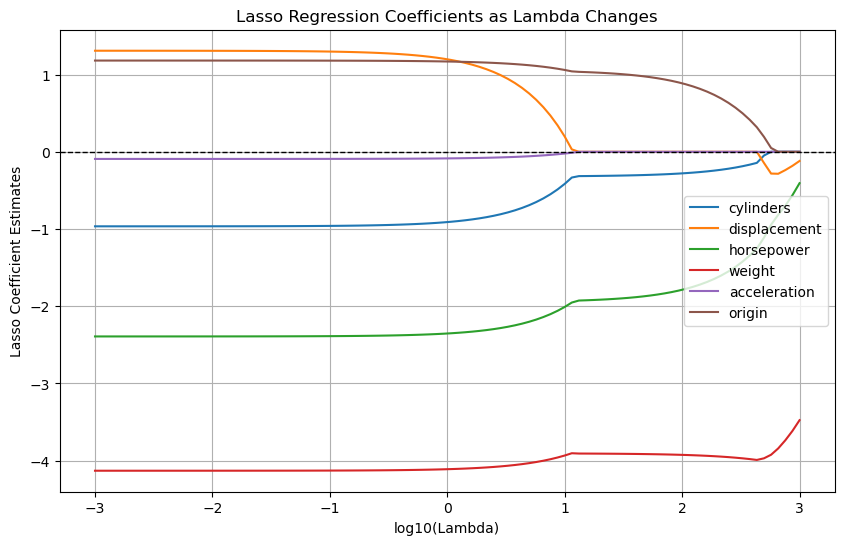

In [89]:
# List of lambda values to explore
lambdas = np.logspace(-3, 3, 100)  # Lambda values from 10^-3 to 10^3

# Store the coefficients for each lambda value
coefficients = []

# Perform Lasso regression for each lambda value
for lam in lambdas:
    beta_lasso = lasso_regression(X_standardized, y, lam, max_iter=1000, tol=1e-6)
    coefficients.append(beta_lasso)

coefficients = np.array(coefficients)

# Plot Ridge coefficients for each lambda value
plt.figure(figsize=(10, 6))
for i in range(n_features):
    plt.plot(np.log10(lambdas), coefficients[:, i], label=f'{features[i]}')

plt.xlabel('log10(Lambda)')
plt.ylabel('Lasso Coefficient Estimates')
plt.title('Lasso Regression Coefficients as Lambda Changes')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc='best')
plt.grid(True)
plt.show()

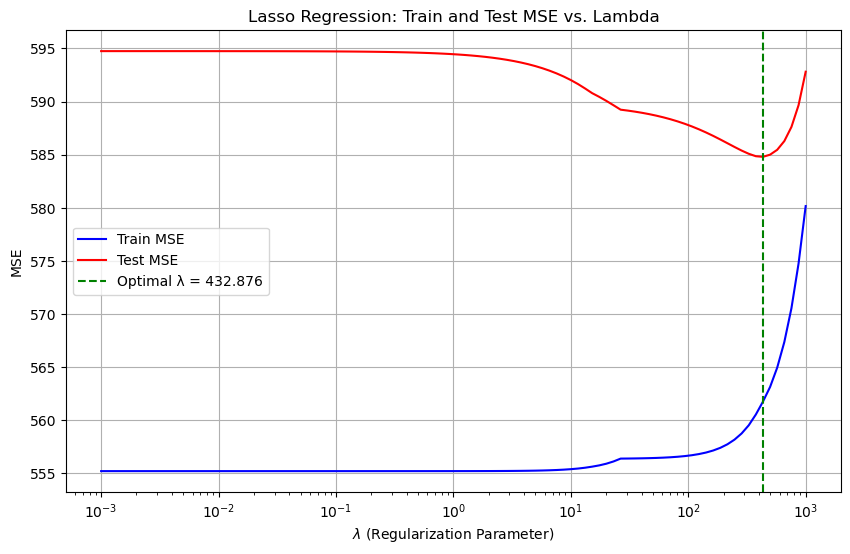

Optimal lambda (λ) value: 432.876
Coefficients with optimal λ:
[-1.54704367 -0.         -0.         -2.54772176  0.          1.336008  ]


In [90]:
# List of lambda values for regularization
lambdas = np.logspace(-3, 3, 100)

# To store the MSE for training and test sets
train_mse = []
test_mse = []

# Perform Lasso regression for each lambda value
for lam in lambdas:
    beta_lasso = lasso_regression(X_train, y_train, lam)  # Fit Lasso regression
    
    # Predictions on training and test sets
    y_pred_train = X_train @ beta_lasso
    y_pred_test = X_test @ beta_lasso
    
    # Compute MSE for training and test sets
    train_mse.append(np.mean((y_train - y_pred_train) ** 2))
    test_mse.append(np.mean((y_test - y_pred_test) ** 2))

# Find the lambda with the minimum test MSE
optimal_lambda_idx = np.argmin(test_mse)
optimal_lambda = lambdas[optimal_lambda_idx]

# Plot the train and test MSE vs. lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_mse, label='Train MSE', color='blue')
plt.plot(lambdas, test_mse, label='Test MSE', color='red')
plt.axvline(x=optimal_lambda, color='green', linestyle='--', label=f'Optimal λ = {optimal_lambda:.3f}')
plt.xscale('log')  # Logarithmic scale for lambda
plt.xlabel(r'$\lambda$ (Regularization Parameter)')
plt.ylabel('MSE')
plt.title('Lasso Regression: Train and Test MSE vs. Lambda')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal lambda
print(f"Optimal lambda (λ) value: {optimal_lambda:.3f}")

# Display the coefficients
beta_optimal = lasso_regression(X_train, y_train, optimal_lambda)
print(f"Coefficients with optimal λ:\n{beta_optimal}")

In [91]:
dict(zip(features,lasso_regression(X_train, y_train, optimal_lambda)))

{'cylinders': -1.5470436744109277,
 'displacement': -0.0,
 'horsepower': -0.0,
 'weight': -2.547721764629211,
 'acceleration': 0.0,
 'origin': 1.3360079979218757}

Compare with sklearn and custom results

In [92]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Choose a lambda value
lam = 1.0

# Perform custom Ridge regression
beta_ridge_custom = ridge_regression(X_train, y_train, lam)

# Perform scikit-learn Ridge regression
ridge_model = Ridge(alpha=lam, fit_intercept=False)  # fit_intercept=False to match custom implementation
ridge_model.fit(X_train, y_train)
beta_ridge_sklearn = ridge_model.coef_

# Compare predictions
y_pred_train_custom = np.array(X_train) @ beta_ridge_custom  # Custom Ridge predictions on training set
y_pred_train_sklearn = ridge_model.predict(X_train)  # scikit-learn Ridge predictions on training set

y_pred_test_custom = np.array(X_test) @ beta_ridge_custom  # Custom Ridge predictions on test set
y_pred_test_sklearn = ridge_model.predict(X_test)  # scikit-learn Ridge predictions on test set

# Compare MSE
custom_train_mse = np.mean((y_train - y_pred_train_custom) ** 2)  # Custom Ridge training MSE
sklearn_train_mse = mean_squared_error(y_train, y_pred_train_sklearn)  # scikit-learn Ridge training MSE

custom_test_mse = np.mean((y_test - y_pred_test_custom) ** 2)  # Custom Ridge test MSE
sklearn_test_mse = mean_squared_error(y_test, y_pred_test_sklearn)  # scikit-learn Ridge test MSE

# Output the results
print("Custom Ridge Coefficients:", beta_ridge_custom)
print("scikit-learn Ridge Coefficients:", beta_ridge_sklearn)

print("\nCustom Ridge Train MSE:", custom_train_mse)
print("scikit-learn Ridge Train MSE:", sklearn_train_mse)

print("\nCustom Ridge Test MSE:", custom_test_mse)
print("scikit-learn Ridge Test MSE:", sklearn_test_mse)

Custom Ridge Coefficients: 0   -3.312819
1    3.732472
2    0.643432
3   -5.098255
4    1.949951
5    2.775971
dtype: float64
scikit-learn Ridge Coefficients: [-3.31281931  3.73247218  0.64343154 -5.09825533  1.9499507   2.77597148]

Custom Ridge Train MSE: 555.2413111968733
scikit-learn Ridge Train MSE: 555.2413111968733

Custom Ridge Test MSE: 594.0099132105123
scikit-learn Ridge Test MSE: 594.0099132105123


<h1 style="font-size:50px; color:black;">Confusion Matrix and Type I/Type II Errors</h1>

### Confusion Matrix

A **confusion matrix** is used to evaluate the performance of a classification model by comparing actual labels with predicted labels. It provides detailed insights into how well the model performs, especially in binary classification tasks. The confusion matrix for a binary classifier is as follows:

|                        | **Predicted Positive** | **Predicted Negative** |
|------------------------|-----------------------|-----------------------|
| **Actual Positive**     | True Positive (TP)    | False Negative (FN)   |
| **Actual Negative**     | False Positive (FP)   | True Negative (TN)    |

- **True Positive (TP)**: The model correctly predicted the positive class.
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)**: The model incorrectly predicted positive when the actual class is negative (**Type I Error**).
- **False Negative (FN)**: The model incorrectly predicted negative when the actual class is positive (**Type II Error**).

### Key Metrics Derived from the Confusion Matrix

1. **Accuracy**: Measures the proportion of correct predictions (both TP and TN) out of the total predictions.
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

2. **Precision (Positive Predictive Value)**: Indicates how many of the predicted positive cases are actually positive.
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Recall (Sensitivity or True Positive Rate)**: Measures how well the model identifies actual positive cases.
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

4. **Specificity (True Negative Rate)**: Measures how well the model identifies actual negative cases.
   $$
   \text{Specificity} = \frac{TN}{TN + FP}
   $$

5. **F1 Score**: The harmonic mean of precision and recall, useful when there is class imbalance.
   $$
   \text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

---

### Type I and Type II Errors

#### Type I Error (False Positive):

- **Definition**: A **Type I Error** occurs when the model **incorrectly predicts a positive class**, meaning it predicts an event that did not happen.
- **In terms of the confusion matrix**: A Type I Error corresponds to **False Positives (FP)**.

  **Example**: A medical test incorrectly indicates that a person has a disease when they do not.

  **Cost of Type I Error**: In some scenarios, a Type I Error might have significant consequences, such as incorrectly diagnosing someone with a disease, leading to unnecessary treatment.

#### Type II Error (False Negative):

- **Definition**: A **Type II Error** occurs when the model **incorrectly predicts a negative class**, meaning it misses an event that did happen.
- **In terms of the confusion matrix**: A Type II Error corresponds to **False Negatives (FN)**.

  **Example**: A medical test fails to detect a disease in a person who actually has it.

  **Cost of Type II Error**: Type II Errors can also be costly, especially in high-stakes situations like failing to diagnose a serious illness.

---

### Trade-off Between Type I and Type II Errors

There is typically a trade-off between **Type I Errors** and **Type II Errors**:
- If you reduce **Type I Errors** (False Positives), you may increase **Type II Errors** (False Negatives).
- If you reduce **Type II Errors** (False Negatives), you may increase **Type I Errors** (False Positives).

This trade-off is controlled by adjusting the **decision threshold** of the model. For example, in a medical diagnosis scenario, you may want to prioritize minimizing **Type II Errors** to avoid missing a diagnosis, even if it increases **Type I Errors** (more false alarms).

---

### Summary

- A **confusion matrix** helps evaluate model performance in terms of **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, and **False Negatives (FN)**.
- **Type I Error** (False Positive): Predicting positive when the actual outcome is negative.
- **Type II Error** (False Negative): Predicting negative when the actual outcome is positive.
- Metrics like **precision**, **recall**, **accuracy**, and **F1 score** can be derived from the confusion matrix to provide a more comprehensive view of the model's performance.
- There is a trade-off between **Type I** and **Type II Errors**, and adjusting the decision threshold can help balance these errors depending on the use case.



In [93]:
# 240929 Dawoon Jeong